In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/eduard/Downloads/well_profiles.csv")
df.columns.to_list()

['id',
 'batch',
 'plate',
 'well',
 'row',
 'column',
 'cell_type',
 'concentration',
 'condition_name',
 'control_type',
 'culture_medium',
 'dmso_percent',
 'image_channels',
 'microscope',
 'perturbation_id',
 'perturbation_type',
 'plate_type',
 'site_count',
 'emb_0000',
 'emb_0001',
 'emb_0002',
 'emb_0003',
 'emb_0004',
 'emb_0005',
 'emb_0006',
 'emb_0007',
 'emb_0008',
 'emb_0009',
 'emb_0010',
 'emb_0011',
 'emb_0012',
 'emb_0013',
 'emb_0014',
 'emb_0015',
 'emb_0016',
 'emb_0017',
 'emb_0018',
 'emb_0019',
 'emb_0020',
 'emb_0021',
 'emb_0022',
 'emb_0023',
 'emb_0024',
 'emb_0025',
 'emb_0026',
 'emb_0027',
 'emb_0028',
 'emb_0029',
 'emb_0030',
 'emb_0031',
 'emb_0032',
 'emb_0033',
 'emb_0034',
 'emb_0035',
 'emb_0036',
 'emb_0037',
 'emb_0038',
 'emb_0039',
 'emb_0040',
 'emb_0041',
 'emb_0042',
 'emb_0043',
 'emb_0044',
 'emb_0045',
 'emb_0046',
 'emb_0047',
 'emb_0048',
 'emb_0049',
 'emb_0050',
 'emb_0051',
 'emb_0052',
 'emb_0053',
 'emb_0054',
 'emb_0055',
 'emb_0

In [146]:
embs = []
for col in df.columns:
    if "emb" in col:
        embs.append(col)

for col in df.columns:
    if "QC" in col:
        if col == "QC_nan_count":
            continue
        embs.append(col)

for col in df.columns:
    if "score" in col:
        if col == "QC_nan_count":
            continue
        embs.append(col)

for col in df.columns:
    if "umap" in col or "pca" in col:
        if col == "QC_nan_count":
            continue
        embs.append(col)
        
embs

['emb_0000',
 'emb_0001',
 'emb_0002',
 'emb_0003',
 'emb_0004',
 'emb_0005',
 'emb_0006',
 'emb_0007',
 'emb_0008',
 'emb_0009',
 'emb_0010',
 'emb_0011',
 'emb_0012',
 'emb_0013',
 'emb_0014',
 'emb_0015',
 'emb_0016',
 'emb_0017',
 'emb_0018',
 'emb_0019',
 'emb_0020',
 'emb_0021',
 'emb_0022',
 'emb_0023',
 'emb_0024',
 'emb_0025',
 'emb_0026',
 'emb_0027',
 'emb_0028',
 'emb_0029',
 'emb_0030',
 'emb_0031',
 'emb_0032',
 'emb_0033',
 'emb_0034',
 'emb_0035',
 'emb_0036',
 'emb_0037',
 'emb_0038',
 'emb_0039',
 'emb_0040',
 'emb_0041',
 'emb_0042',
 'emb_0043',
 'emb_0044',
 'emb_0045',
 'emb_0046',
 'emb_0047',
 'emb_0048',
 'emb_0049',
 'emb_0050',
 'emb_0051',
 'emb_0052',
 'emb_0053',
 'emb_0054',
 'emb_0055',
 'emb_0056',
 'emb_0057',
 'emb_0058',
 'emb_0059',
 'emb_0060',
 'emb_0061',
 'emb_0062',
 'emb_0063',
 'emb_0064',
 'emb_0065',
 'emb_0066',
 'emb_0067',
 'emb_0068',
 'emb_0069',
 'emb_0070',
 'emb_0071',
 'emb_0072',
 'emb_0073',
 'emb_0074',
 'emb_0075',
 'emb_0076',

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


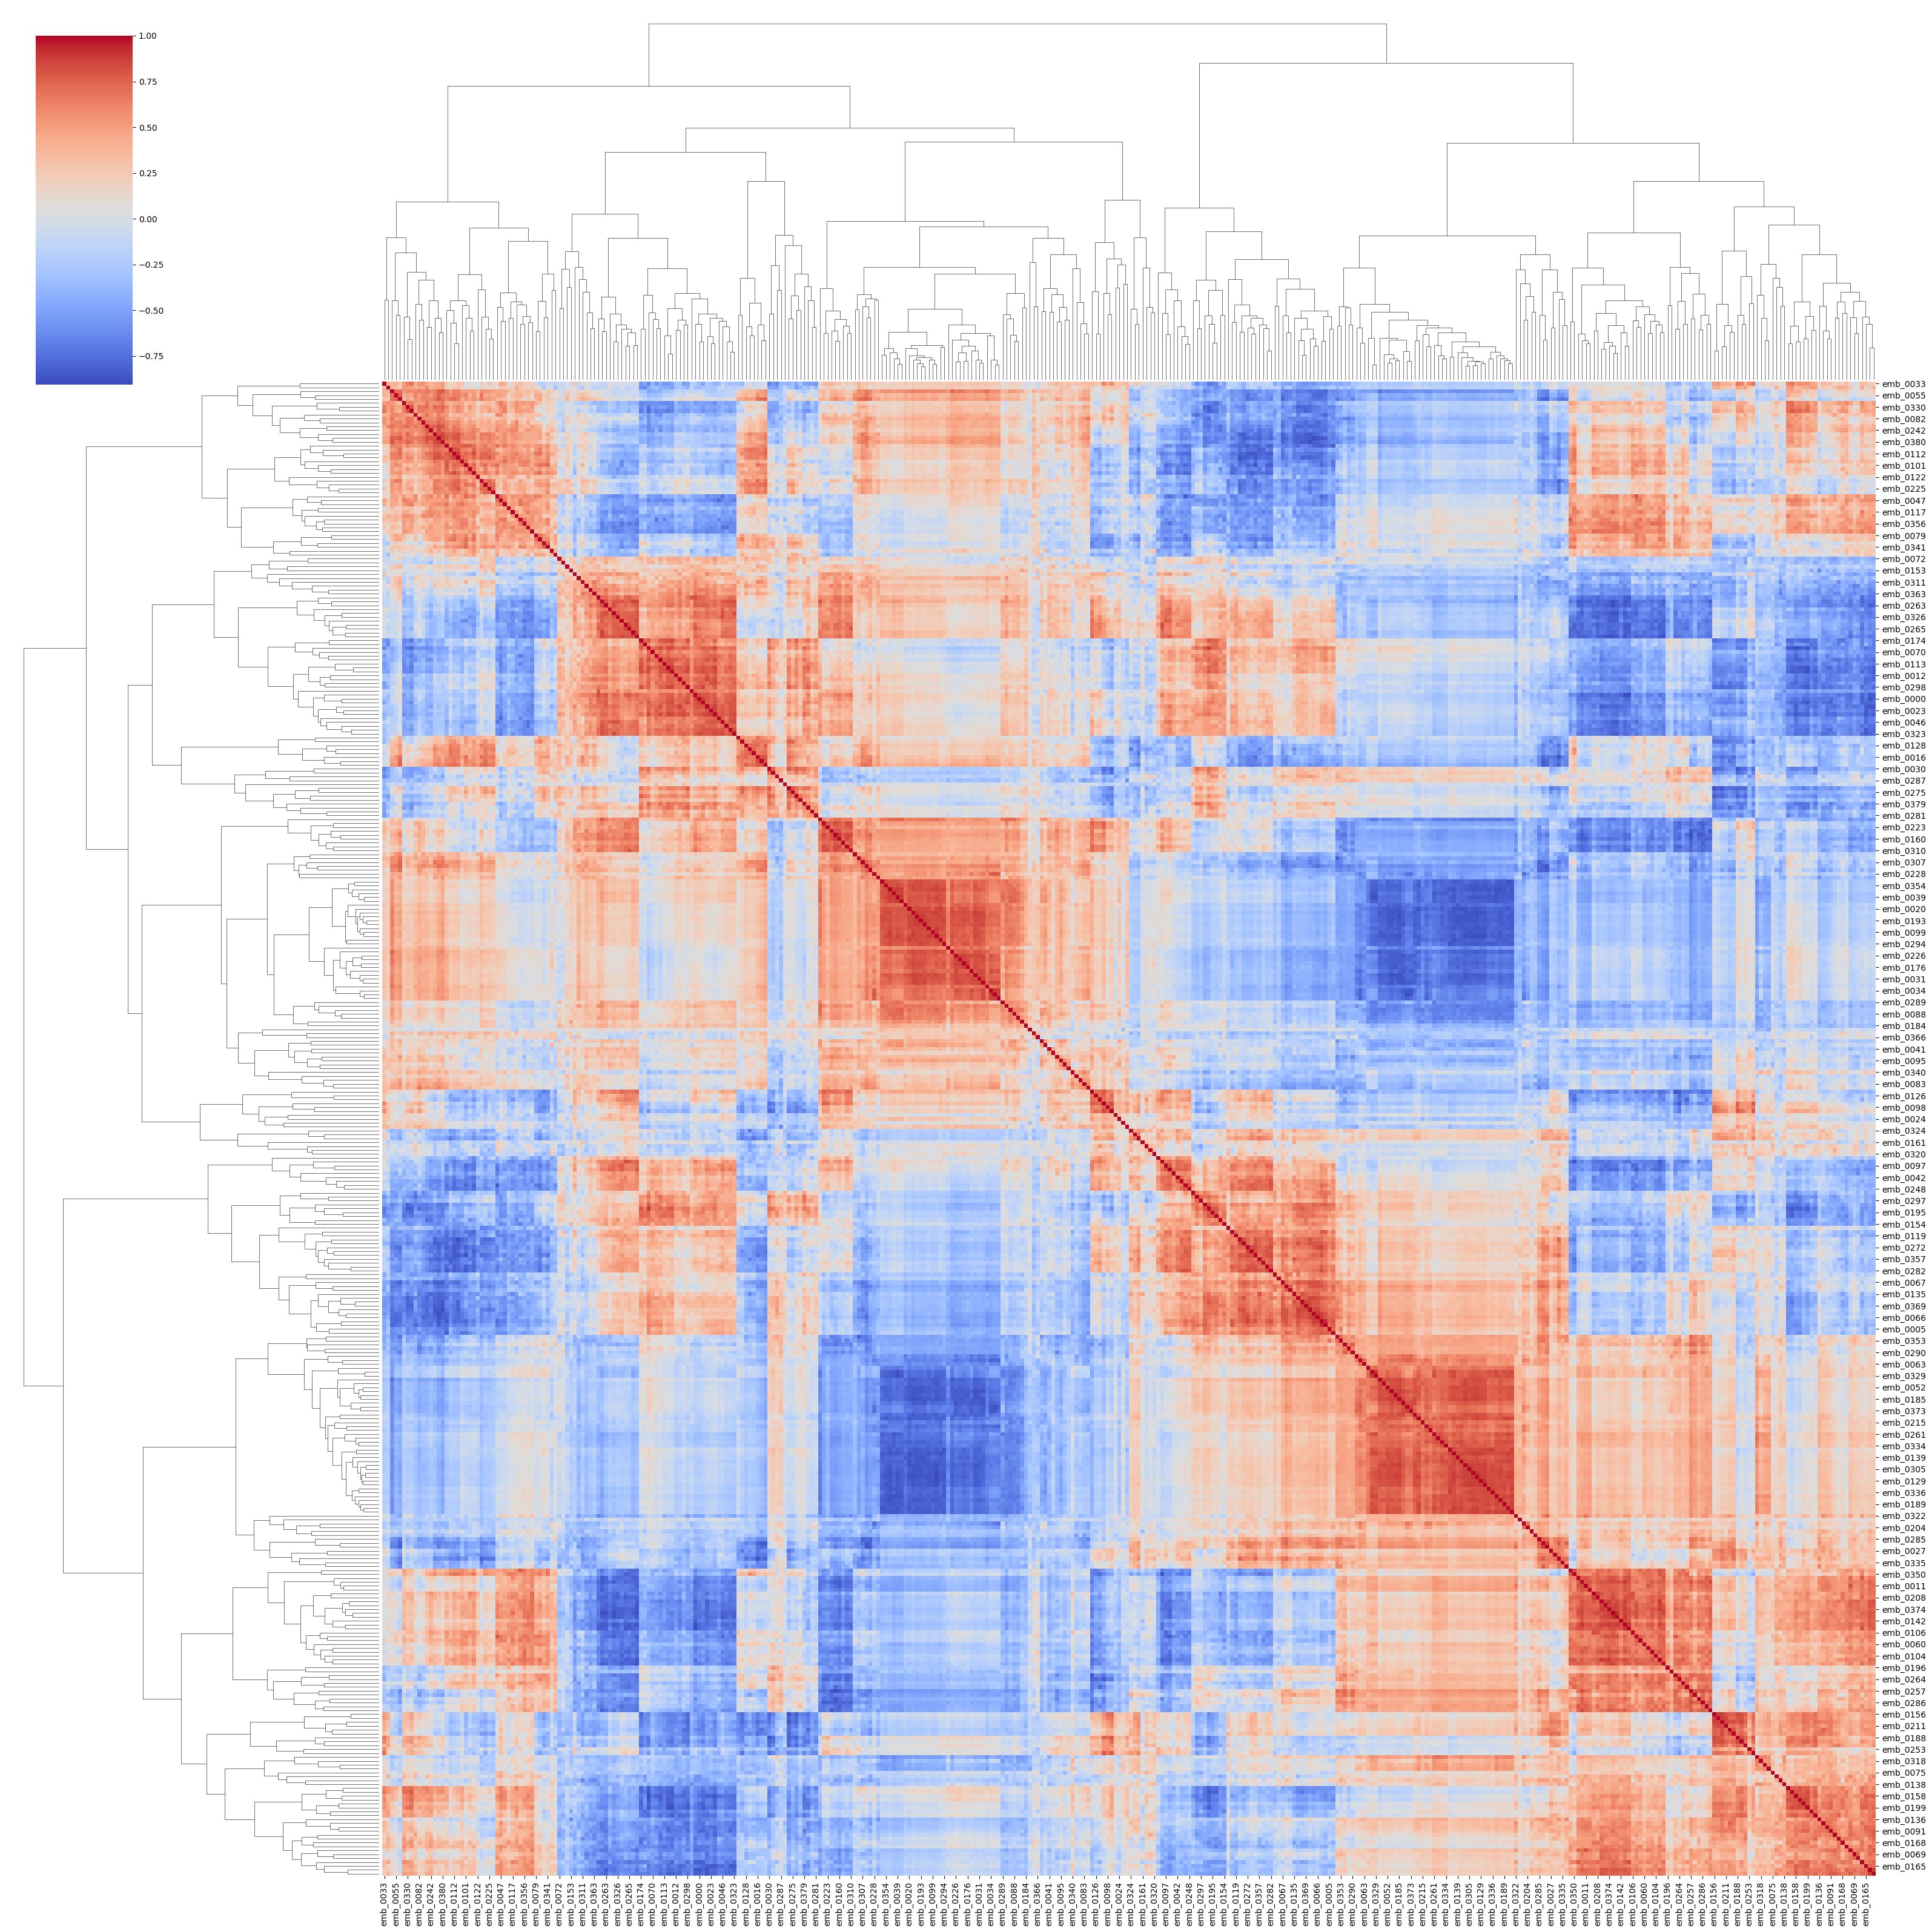

In [14]:
import seaborn as sns
corr_matrix = df[embs].corr(method='spearman')
# fig, ax1 = plt.subplots(figsize = (8,8), dpi = 200)
res = sns.clustermap(corr_matrix, cmap='coolwarm', figsize=(32, 32))

In [15]:
df.columns

Index(['id', 'batch', 'plate', 'well', 'row', 'column', 'cell_type',
       'concentration', 'condition_name', 'control_type',
       ...
       'score_pert_on_negcon_condition_0367',
       'score_pert_off_negcon_condition_0367',
       'score_pert_on_negcon_condition_0371',
       'score_pert_off_negcon_condition_0371', 'pca_x', 'pca_y',
       'umap_euclidean_x', 'umap_euclidean_y', 'umap_cosine_x',
       'umap_cosine_y'],
      dtype='object', length=491)

In [21]:
np.unique(df["condition_name"])

(1389,)

In [4]:
np.unique(df["plate_type"])

array(['jumpcp_ref', 'screening'], dtype=object)

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



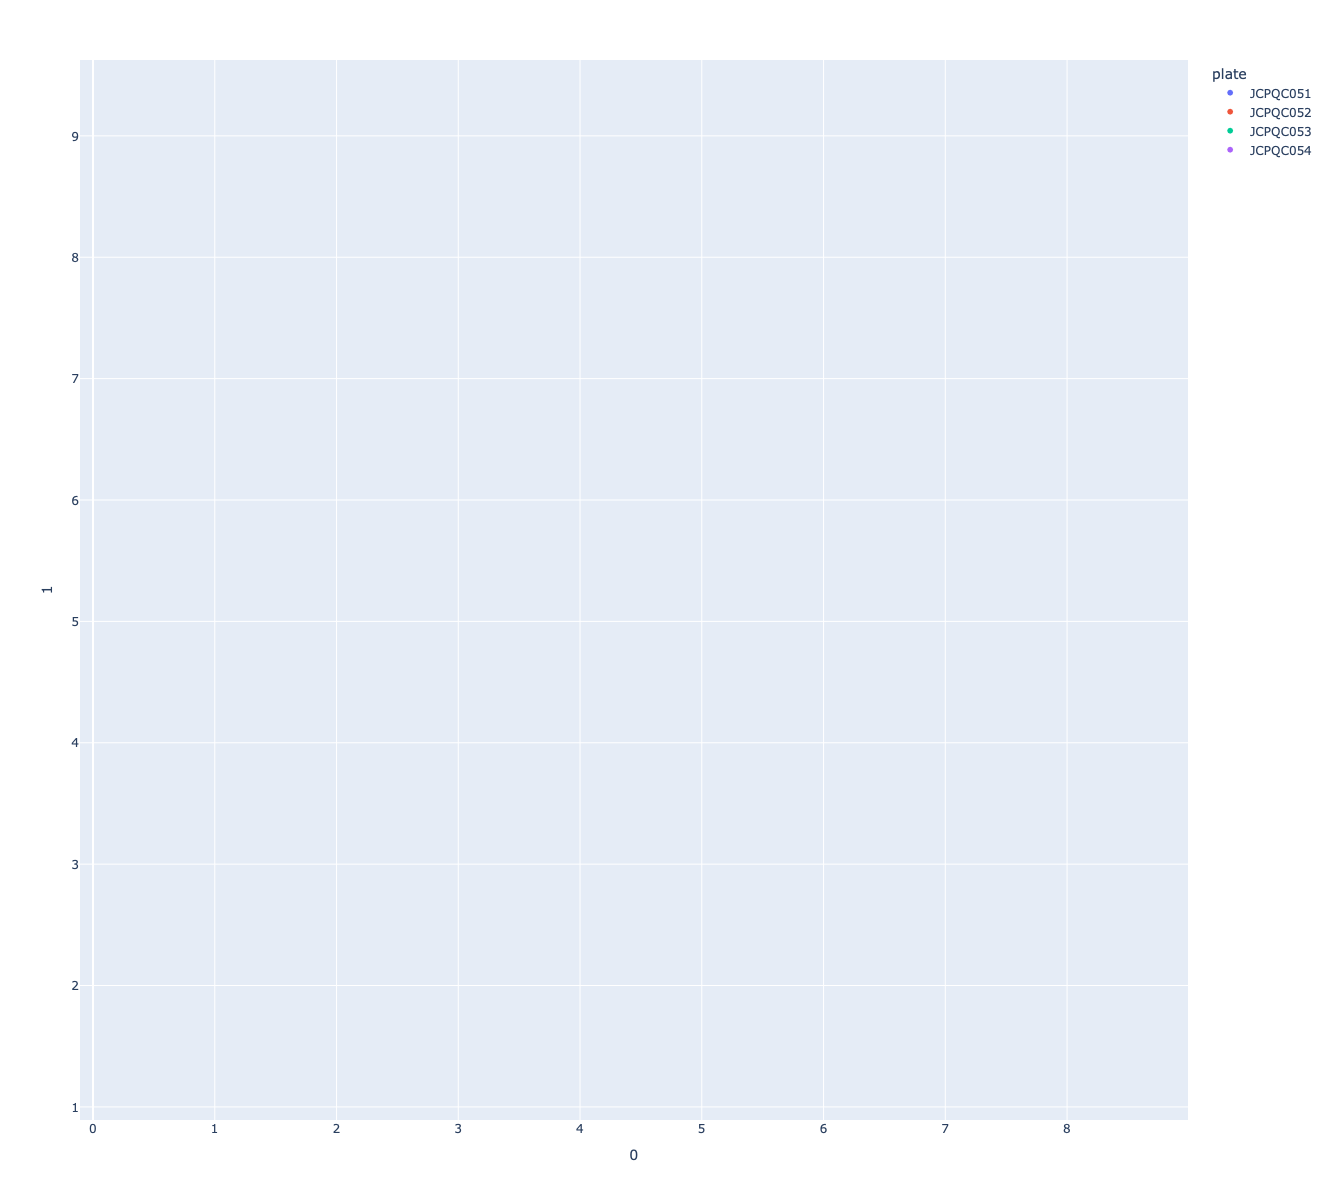

In [26]:
import plotly.express as px
import umap.umap_ as umap

features = df.query("plate_type == 'jumpcp_ref'").loc[:, df.columns.isin(embs)]
plates = df.query("plate_type == 'jumpcp_ref'").plate
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=plates, labels={'color': 'plate'}
)
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.plate, labels={'color': 'plate'}
# )
# fig_3d.update_traces(marker_size=5)
fig_2d.update_traces()
fig_2d.update_layout(
    height=1200,  # set the height in pixels
    width=1200    # set the width in pixels
)
fig_2d.show()
# fig_3d.show()

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



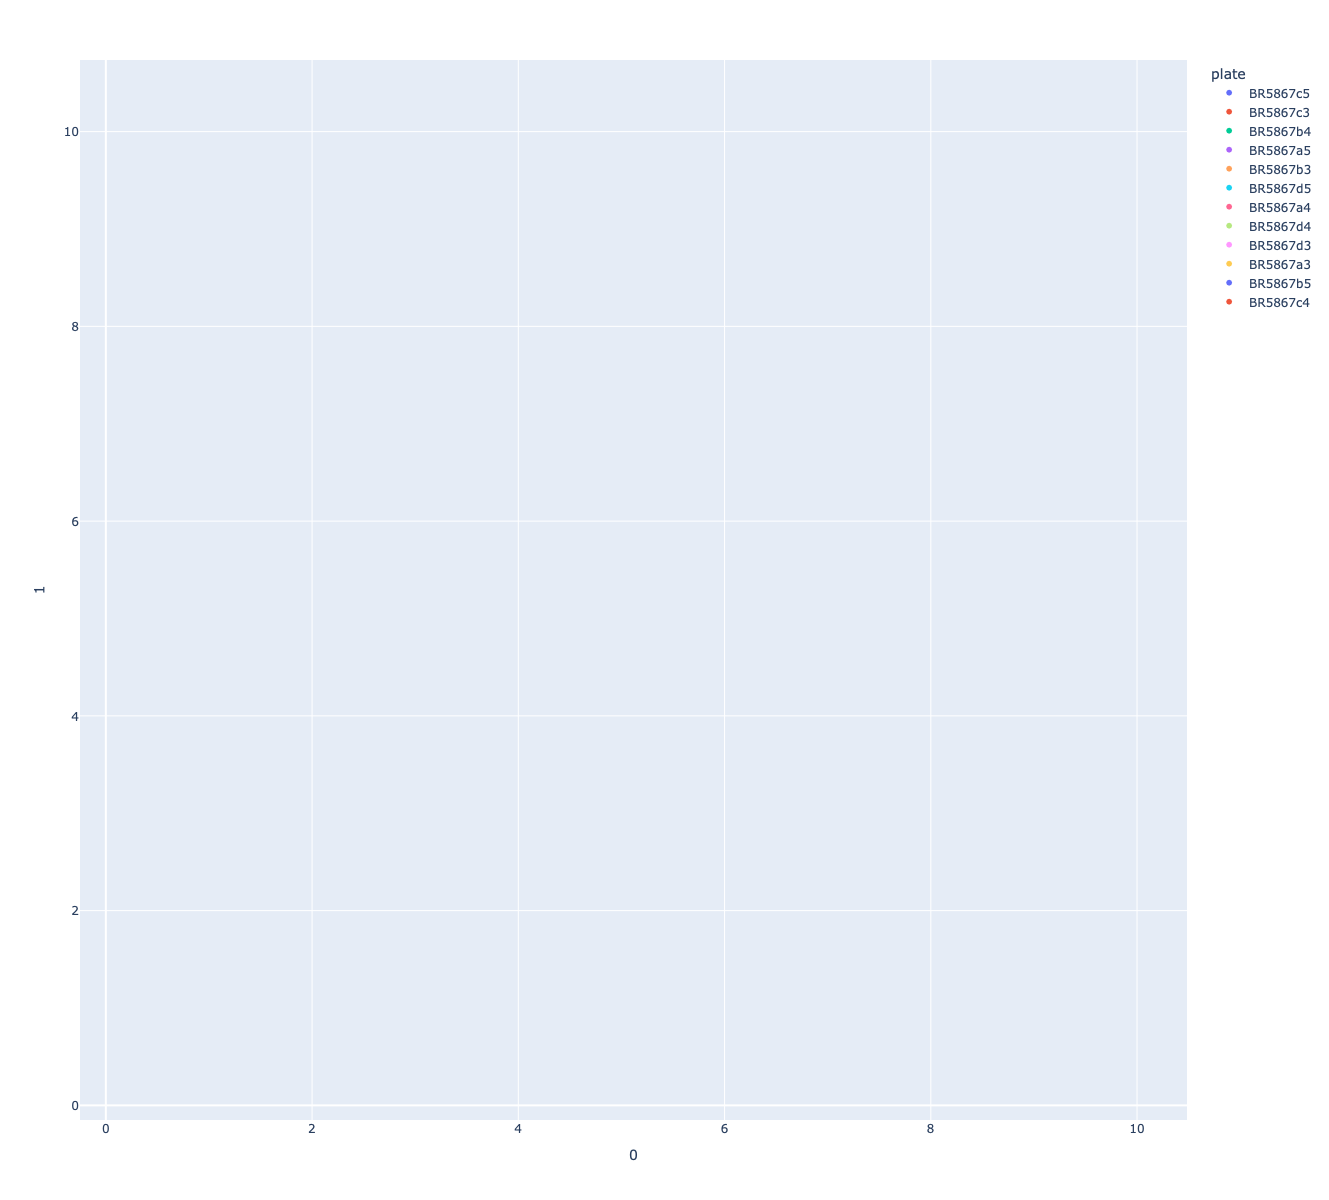

In [27]:
import plotly.express as px
import umap.umap_ as umap

features = df.query("plate_type == 'screening'").loc[:, df.columns.isin(embs)]
plates = df.query("plate_type == 'screening'").plate
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=plates, labels={'color': 'plate'}
)
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.plate, labels={'color': 'plate'}
# )
# fig_3d.update_traces(marker_size=5)
fig_2d.update_traces()
fig_2d.update_layout(
    height=1200,  # set the height in pixels
    width=1200    # set the width in pixels
)
fig_2d.show()
# fig_3d.show()

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



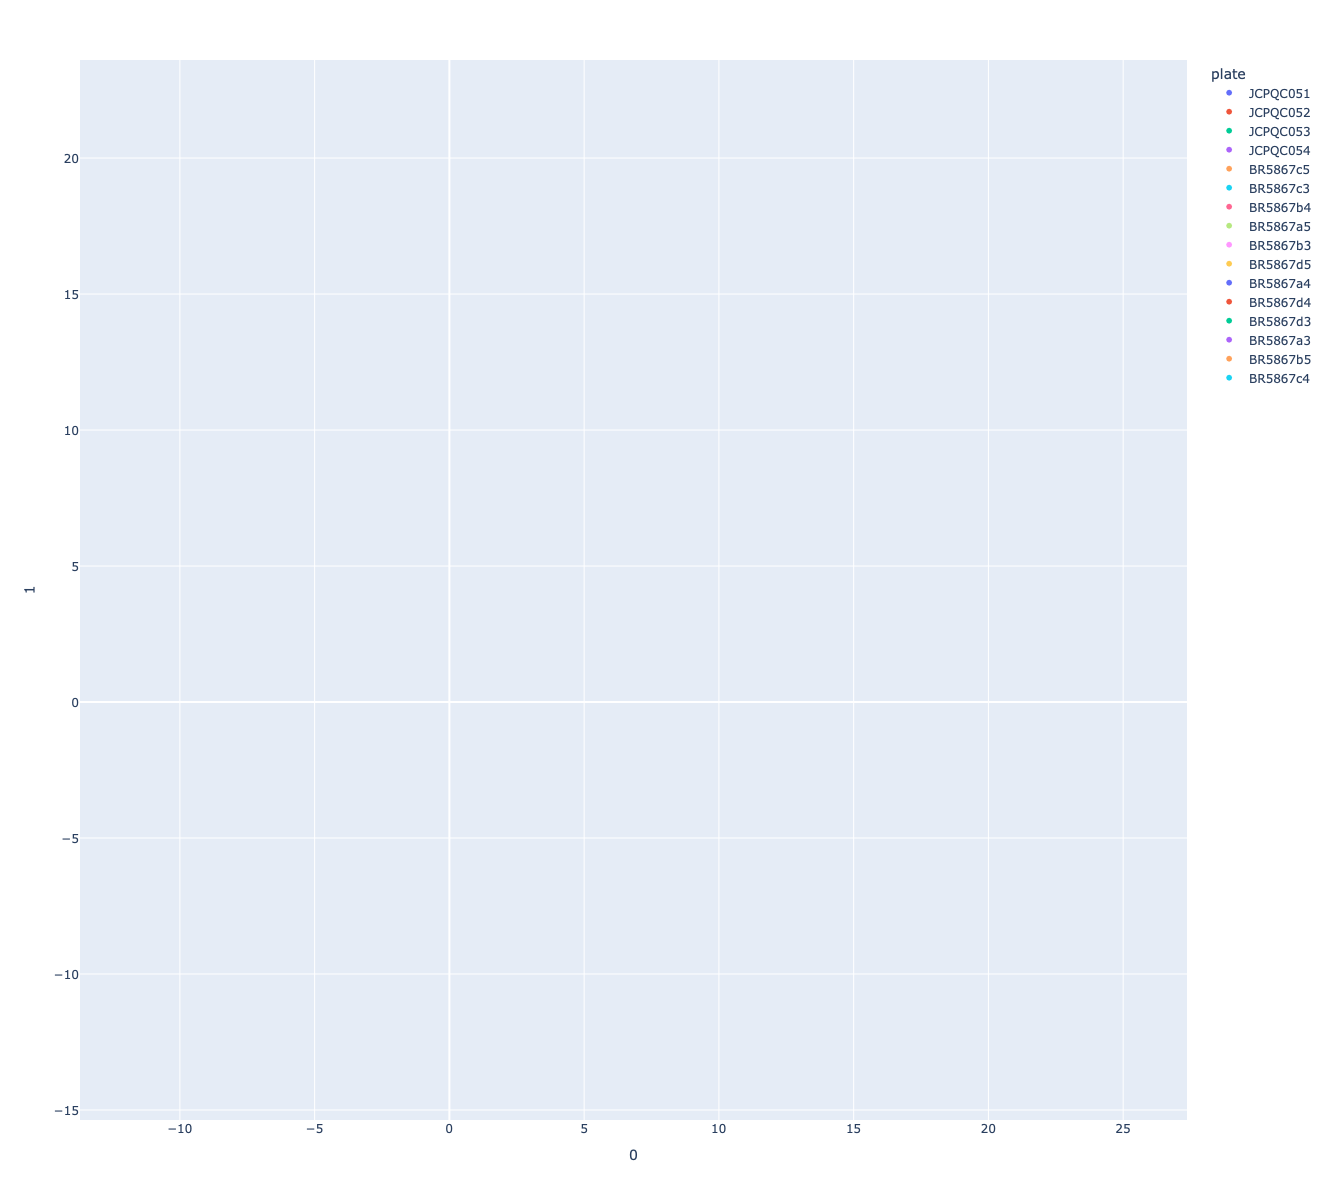

In [9]:
import plotly.express as px
import umap.umap_ as umap

features = df.loc[:, df.columns.isin(embs)]
plates = df.plate
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=plates, labels={'color': 'plate'}
)
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.plate, labels={'color': 'plate'}
# )
# fig_3d.update_traces(marker_size=5)
fig_2d.update_traces()
fig_2d.update_layout(
    height=1200,  # set the height in pixels
    width=1200    # set the width in pixels
)
fig_2d.show()
# fig_3d.show()

In [22]:
df.plate_type

0       jumpcp_ref
1       jumpcp_ref
2       jumpcp_ref
3       jumpcp_ref
4       jumpcp_ref
           ...    
5658     screening
5659     screening
5660     screening
5661     screening
5662     screening
Name: plate_type, Length: 5663, dtype: object

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



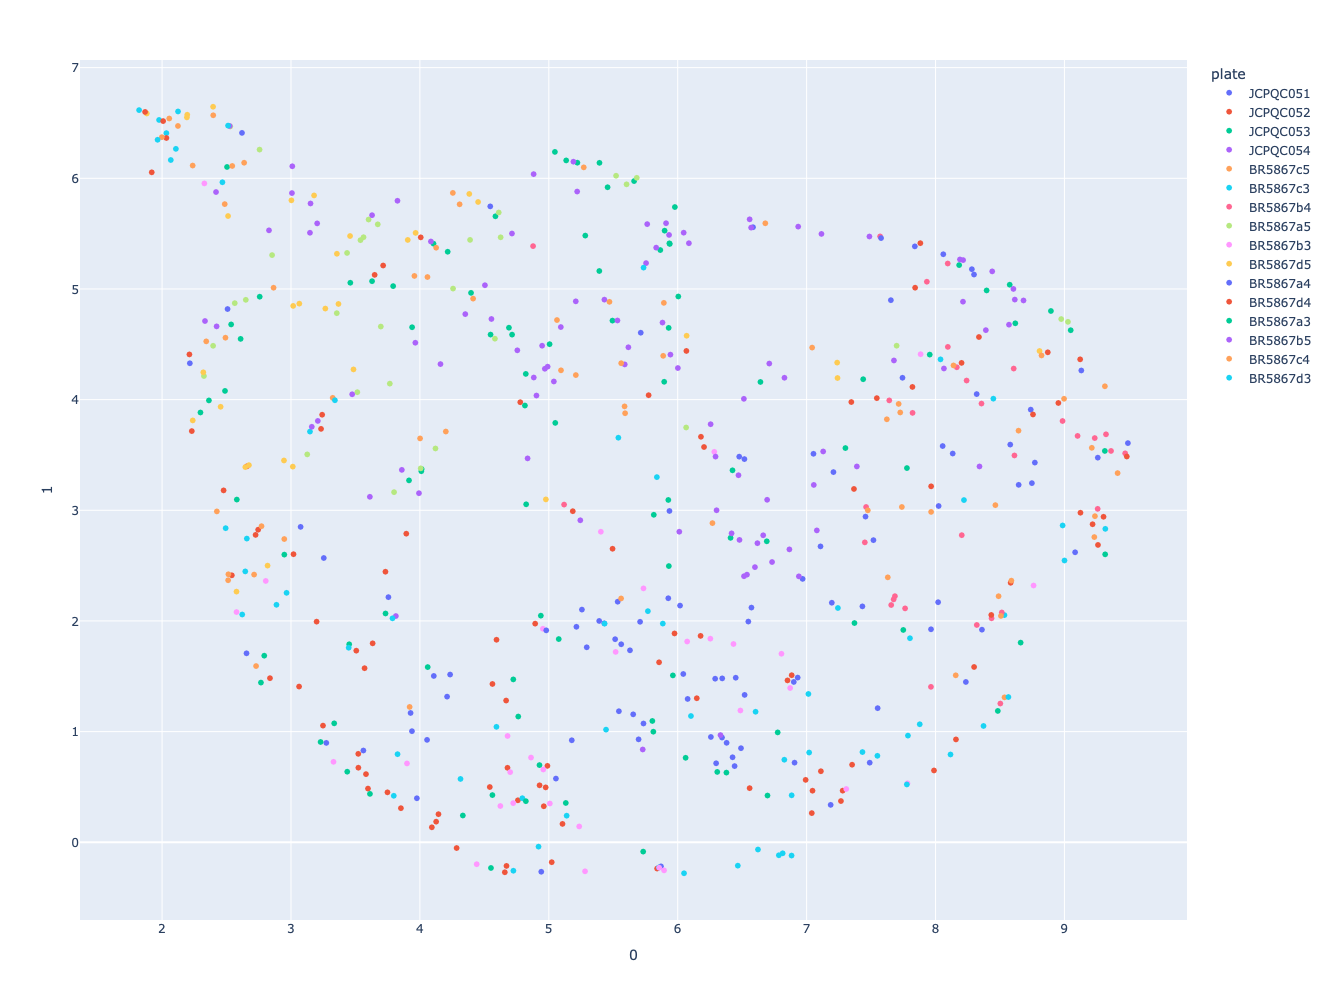

In [29]:
import plotly.express as px
import umap.umap_ as umap

features = df.query("perturbation_id == 'DMSO'").loc[:, df.columns.isin(embs)]
plates = df.query("perturbation_id == 'DMSO'").plate
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=plates, labels={'color': 'plate'}
)
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.plate, labels={'color': 'plate'}
# )
# fig_3d.update_traces(marker_size=5)
fig_2d.update_traces()
fig_2d.update_layout(
    height=1000,  # set the height in pixels
    width=1000    # set the width in pixels
)
fig_2d.show()
# fig_3d.show()

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



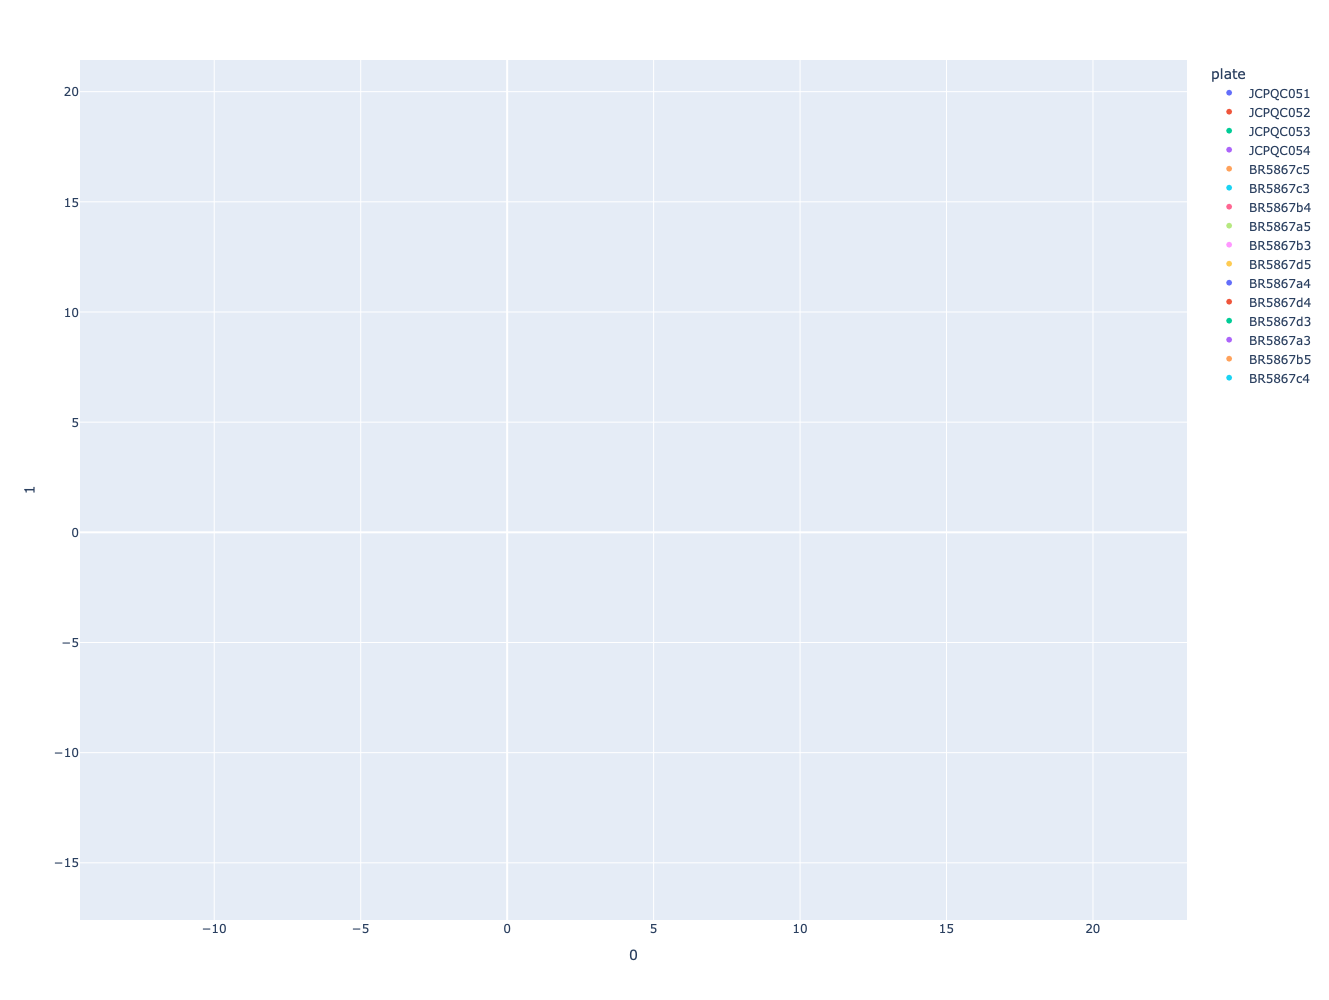

In [21]:
import plotly.express as px
import umap.umap_ as umap

features = df.query("perturbation_id != 'DMSO'").loc[:, df.columns.isin(embs)]
plates = df.query("perturbation_id != 'DMSO'").plate
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=plates, labels={'color': 'plate'}
)
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.plate, labels={'color': 'plate'}
# )
# fig_3d.update_traces(marker_size=5)
fig_2d.update_traces()
fig_2d.update_layout(
    height=1000,  # set the height in pixels
    width=1000    # set the width in pixels
)
fig_2d.show()
# fig_3d.show()

In [ ]:
import plotly.express as px
import umap.umap_ as umap

features = df.query("perturbation_id == 'DMSO'").loc[:, df.columns.isin(embs)]
plates = df.query("perturbation_id == 'DMSO'").plate
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=plates, labels={'color': 'plate'}
)
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.plate, labels={'color': 'plate'}
# )
# fig_3d.update_traces(marker_size=5)
fig_2d.update_traces()
fig_2d.update_layout(
    height=1000,  # set the height in pixels
    width=1000    # set the width in pixels
)
fig_2d.show()
# fig_3d.show()

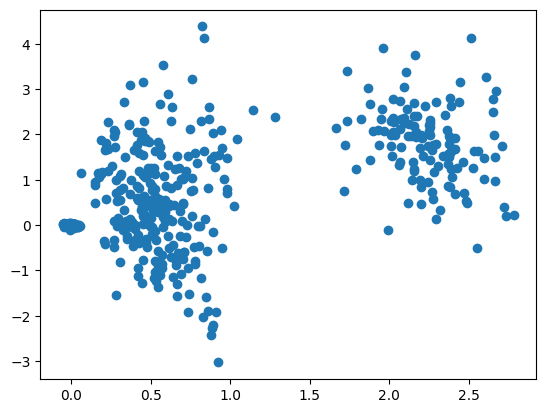

In [20]:
import matplotlib.pyplot as plt
features1 = df.query("perturbation_id == 'DMSO'")["emb_0000"]
features2 = df.query("perturbation_id == 'DMSO'")["emb_0001"]
plates = df.query("perturbation_id == 'DMSO'").plate

plt.scatter(features1,features2)

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



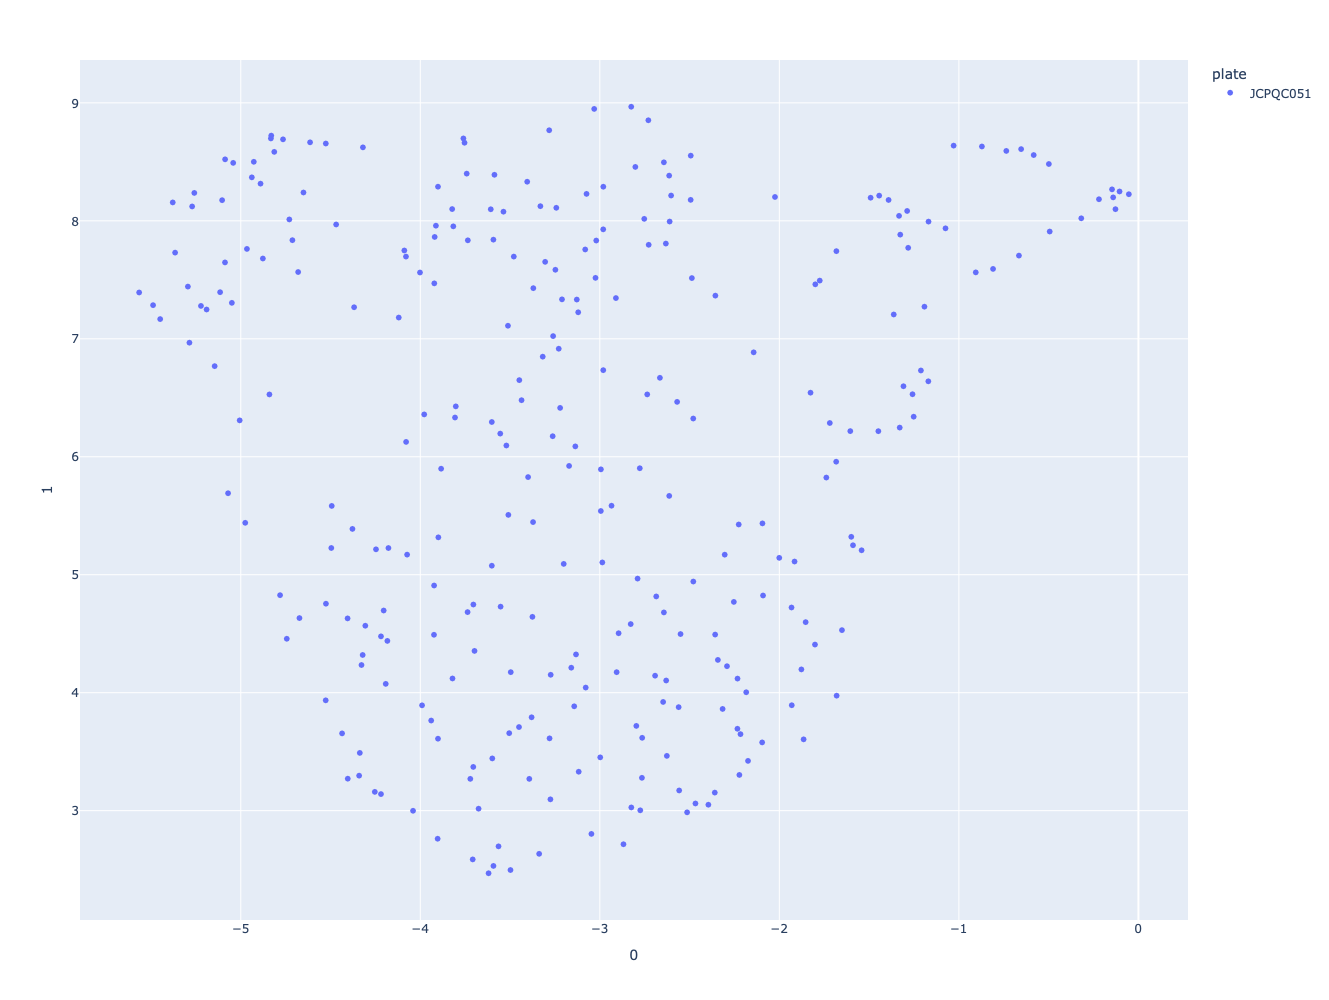

In [52]:
import plotly.express as px
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

features = df.query("perturbation_id != 'DMSO' & plate == 'JCPQC051'").loc[:, df.columns.isin(embs)]
#print(features)
features = StandardScaler().fit_transform(features)
#print(features)
plates = df.query("perturbation_id != 'DMSO' & plate == 'JCPQC051'").plate
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=plates, labels={'color': 'plate'}
)
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.plate, labels={'color': 'plate'}
# )
# fig_3d.update_traces(marker_size=5)
fig_2d.update_traces()
fig_2d.update_layout(
    height=1000,  # set the height in pixels
    width=1000    # set the width in pixels
)
fig_2d.show()
# fig_3d.show()

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



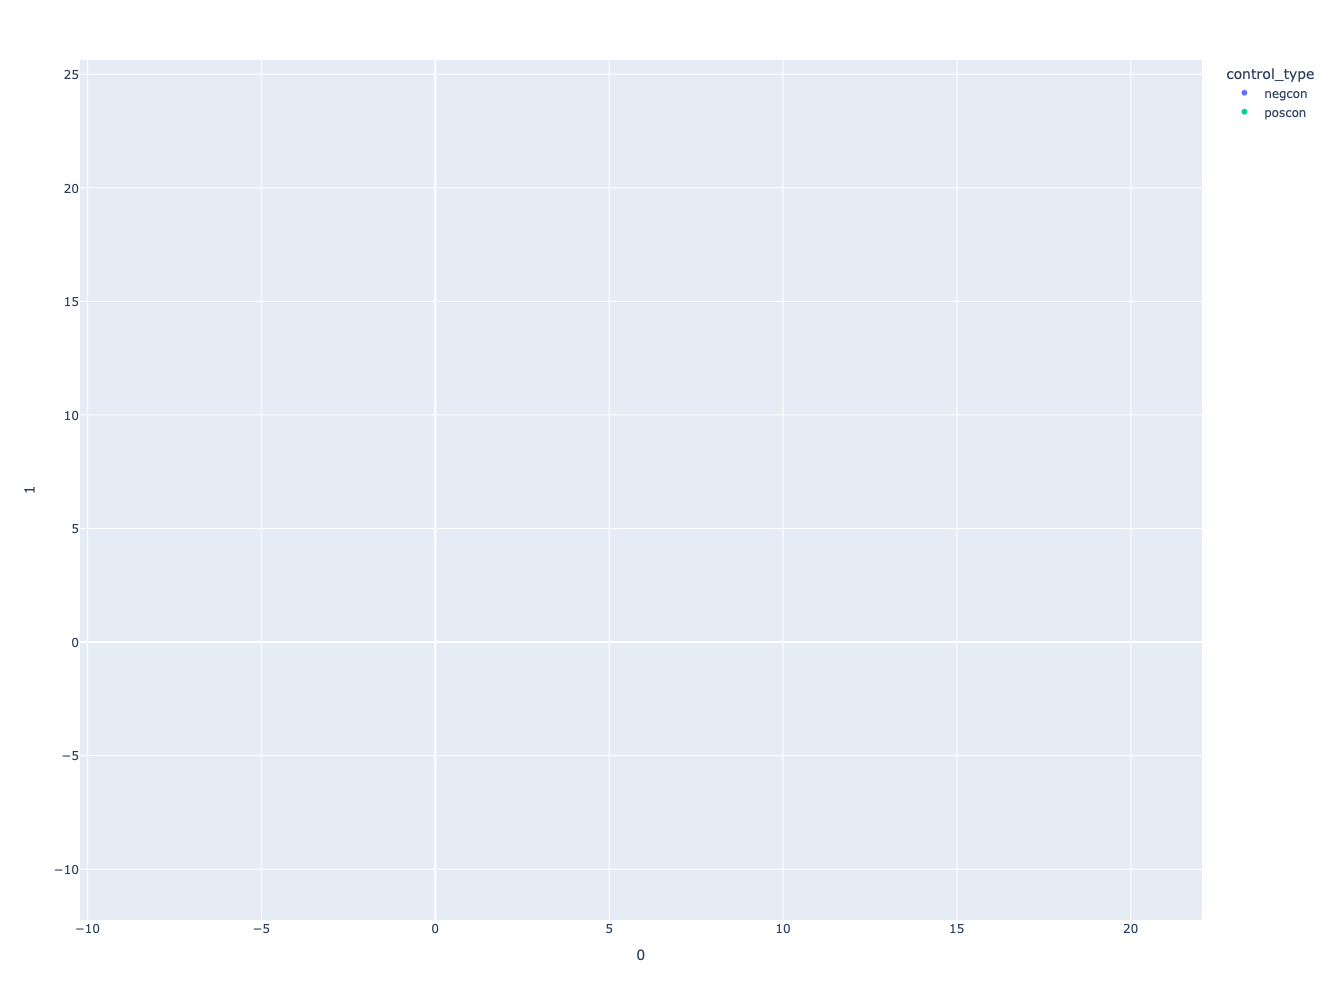

In [63]:
import plotly.express as px
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

features = df.query("plate_type == 'screening'").loc[:, df.columns.isin(embs)]
#print(features)
features = StandardScaler().fit_transform(features)
#print(features)
control_type = df.query("plate_type == 'screening'").control_type
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=control_type, labels={'color': 'control_type'}
)
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.plate, labels={'color': 'plate'}
# )
# fig_3d.update_traces(marker_size=5)
fig_2d.update_traces()
fig_2d.update_layout(
    height=1000,  # set the height in pixels
    width=1000    # set the width in pixels
)
fig_2d.show()
# fig_3d.show()

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



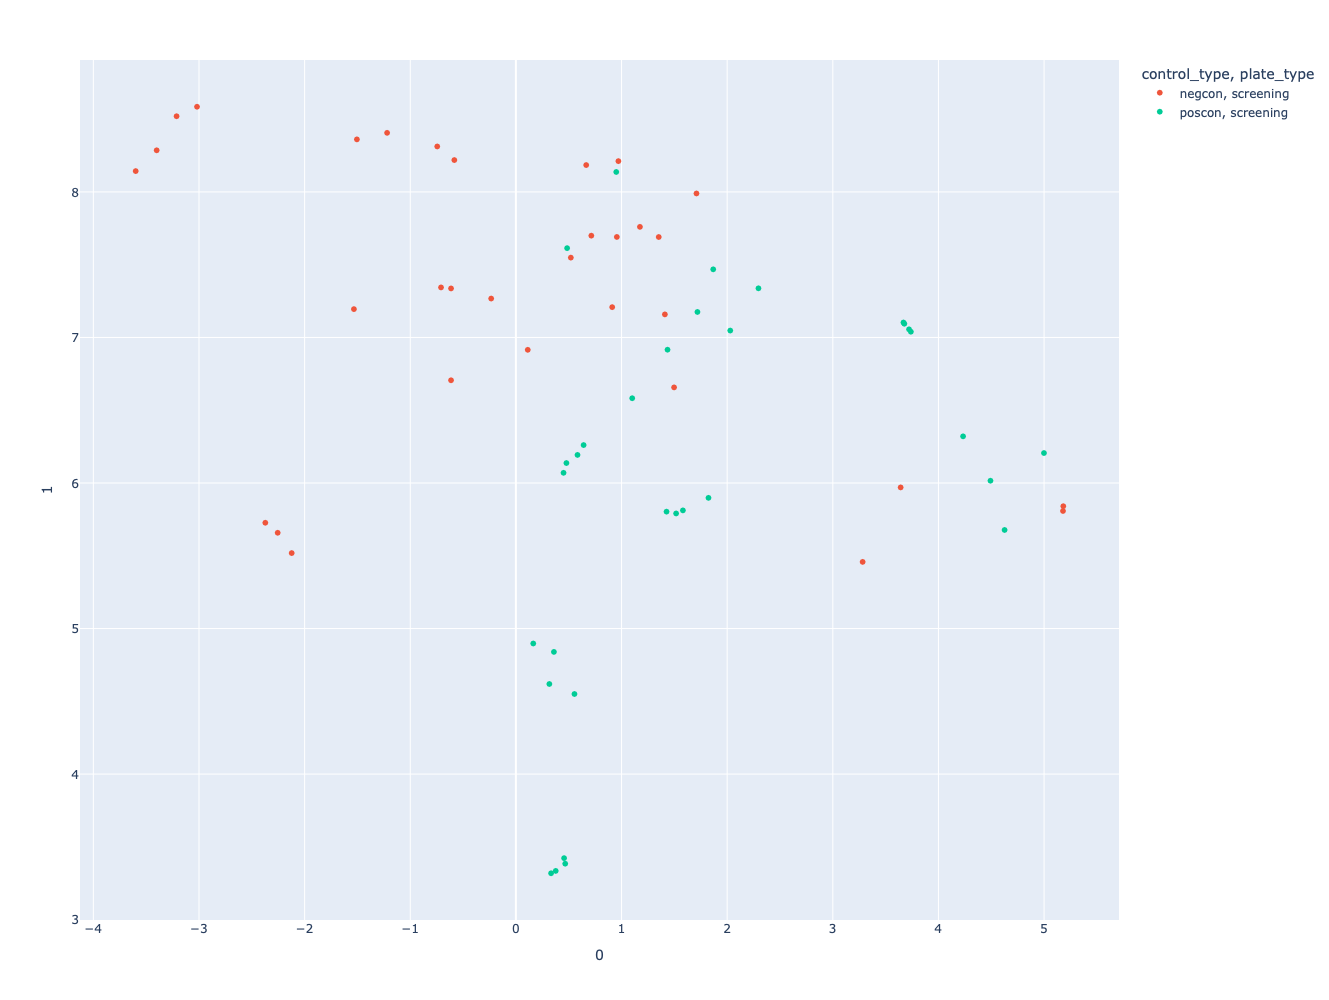

In [70]:
import plotly.express as px
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

# Filter and scale the features
features = df.query("plate == 'BR5867d3'").loc[:, df.columns.isin(embs)]
features = StandardScaler().fit_transform(features)

# Extract the control_type and plate columns
control_type = df.query("plate == 'BR5867d3'").control_type
#plate = df.query("plate_type == 'screening'").plate
plate_type = df.query("plate == 'BR5867d3'").plate_type

# Apply UMAP to reduce dimensions to 2D
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
proj_2d = umap_2d.fit_transform(features)

# Create a scatter plot using both color and symbol for different categories
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=control_type,          # color points by control_type
    symbol=plate_type,                # use plate column for marker shapes
    labels={'color': 'control_type', 'symbol': 'plate_type'}  # Add labels
)

# Update layout for size of plot
fig_2d.update_layout(
    height=1000,  # set the height in pixels
    width=1000    # set the width in pixels
)

# Show the plot
fig_2d.show()


In [49]:
features

array([[ 0.98064854, -2.29186644, -0.84911972, ...,  0.15864678,
        -0.06644345,  1.467478  ],
       [-0.65520795, -1.76271712, -0.01716957, ..., -0.13657132,
         2.92996007,  1.467478  ],
       [-0.9211169 , -0.47241704,  0.27807225, ...,  0.6805502 ,
         0.15559543, -0.38770406],
       ...,
       [-0.25939835,  0.86352988, -0.902895  , ...,  0.05321174,
        -0.27278262, -0.15580631],
       [ 0.12573426, -1.64926467, -0.47347608, ..., -0.25782161,
         1.42054422,  4.94594436],
       [ 0.45752212, -0.43142348,  0.46602459, ...,  0.65419145,
         3.37628065, -0.61960182]])

In [71]:
df.plate_type

0       jumpcp_ref
1       jumpcp_ref
2       jumpcp_ref
3       jumpcp_ref
4       jumpcp_ref
           ...    
5658     screening
5659     screening
5660     screening
5661     screening
5662     screening
Name: plate_type, Length: 5663, dtype: object

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



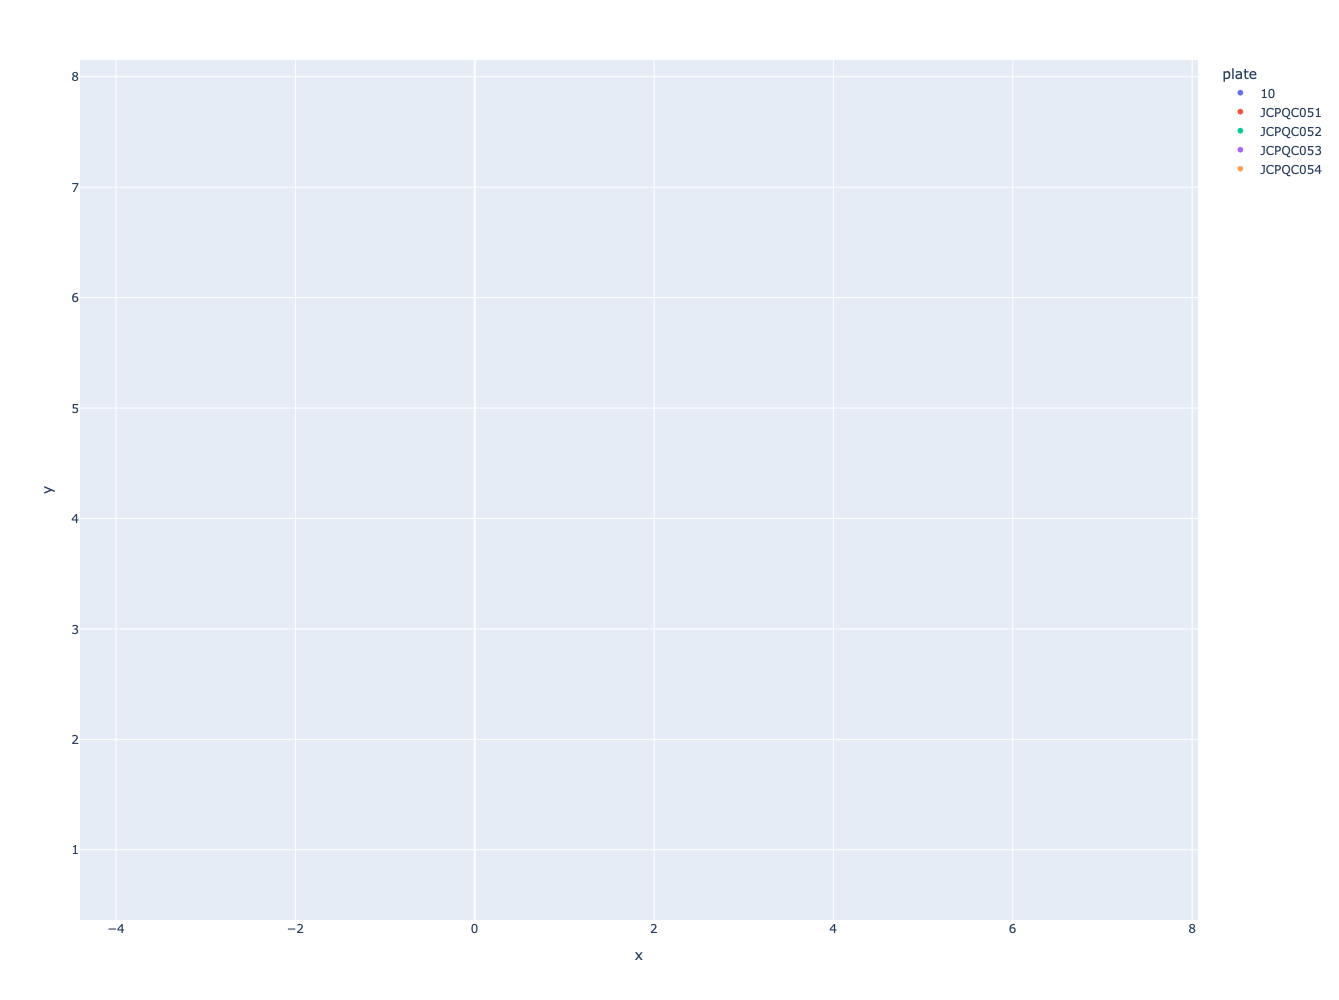

In [151]:
import plotly.express as px
import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
n_neighbors = 10
features = df.query("control_type == 'negcon' & plate_type == 'jumpcp_ref'").loc[:, df.columns.isin(embs)]
features_pos = df.query("control_type != 'negcon' & plate_type == 'jumpcp_ref'").loc[:, df.columns.isin(embs)]
features = pd.concat([features, features_pos])
features = StandardScaler().fit_transform(features)
plates_pos = pd.Series(len(df.query("control_type != 'negcon' & plate_type == 'jumpcp_ref'").plate)*[10])
plates = df.query("control_type == 'negcon' & plate_type == 'jumpcp_ref'").plate
plates = pd.concat([plates_pos, plates])

#features = PCA(n_components=10).fit_transform(features)

umap_2d = umap.UMAP(n_components=2, init='random', random_state=0, 
                    #n_neighbors=n_neighbors
                   )
#umap_3d = umap.UMAP(n_components=3, init='random', random_state=0, n_neighbors=n_neighbors)

proj_2d = umap_2d.fit_transform(features)
#proj_2d = features
#proj_3d = umap_3d.fit_transform(features)

# fig_2d = px.scatter(
#     proj_2d, x=0, y=1,
#     color=plates, labels={'color': 'plate'}
# )

fig_2d = px.scatter(
    x=proj_2d[:,0], y=proj_2d[:,1],
    color=plates, labels={'color': 'plate'}
)
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.plate, labels={'color': 'plate'}
# )
# fig_3d.update_traces(marker_size=5)


# tsne = TSNE(n_components=2, random_state=0, perplexity=60.0)
# projections = tsne.fit_transform(features)

# fig_2d = px.scatter(
#     projections, x=0, y=1,
#     color=plates, labels={'color': 'plates'}
# )

fig_2d.update_traces()
fig_2d.update_layout(
    height=1000,  # set the height in pixels
    width=1000    # set the width in pixels
)
fig_2d.show()
# fig_3d.show()

In [100]:
fig, ax = plt

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 36.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 6.6 MB/s eta 0:00:00
  Created wheel for session-info: filename=se

In [148]:
import lightgbm
from sklearn.model_selection import train_test_split
X = df.query("plate_type == 'jumpcp_ref'").dropna().loc[:, df.columns.isin(embs)]
y = df.query("plate_type == 'jumpcp_ref'").dropna().control_type
# scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.map({'negcon':0,'poscon':1}).values, random_state=13,  shuffle=True
)

# scaler = StandardScaler()

#X_train = preproc.fit_transform(X_train[:,:-1])

# X_train = scaler.fit_transform(X_train[:,:-1])
#rf = RandomForestClassifier()
rf = lightgbm.LGBMClassifier()
rf.fit(X_train, y_train,
       # feature_name=[f"PC {i}" for i in range(1,pca_num+1)]
       #feature_name = list(X.columns)
      )

# X_test = pd.DataFrame(X_test)
# X_test.columns = X.columns
# X_test = smear_data(X_test).to_numpy()
# X_test = preproc.fit_transform(X_test[:,:-1])
# X_test = scaler.fit_transform(X_test[:,:-1])

[LightGBM] [Info] Number of positive: 24, number of negative: 198
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33825
[LightGBM] [Info] Number of data points in the train set: 222, number of used features: 471
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.108108 -> initscore=-2.110213
[LightGBM] [Info] Start training from score -2.110213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier()

In [126]:
df.query("plate_type == 'jumpcp_ref'").loc[df.query("plate_type == 'jumpcp_ref'")["control_type"].isna()]

id                            batch     plate  \
0     66ab99215c14a083ec30e4a7  inactive_2022_NUVISAN_CP_JUMPCP  JCPQC051   
1     66ab98bd346c27b97f18b10f  inactive_2022_NUVISAN_CP_JUMPCP  JCPQC052   
2     66ab98bd346c27b97f18b110  inactive_2022_NUVISAN_CP_JUMPCP  JCPQC052   
3     66ab98bd346c27b97f18b111  inactive_2022_NUVISAN_CP_JUMPCP  JCPQC052   
4     66ab98bd346c27b97f18b112  inactive_2022_NUVISAN_CP_JUMPCP  JCPQC052   
...                        ...                              ...       ...   
1386  66ab98d27e520ebcba006fc0  inactive_2022_NUVISAN_CP_JUMPCP  JCPQC054   
1387  66ab99215c14a083ec30e496  inactive_2022_NUVISAN_CP_JUMPCP  JCPQC051   
1388  66ab99215c14a083ec30e4a8  inactive_2022_NUVISAN_CP_JUMPCP  JCPQC051   
1389  66ab98d27e520ebcba006fc1  inactive_2022_NUVISAN_CP_JUMPCP  JCPQC054   
1390  66ab98d27e520ebcba006fc2  inactive_2022_NUVISAN_CP_JUMPCP  JCPQC054   

     well  row  column cell_type  concentration              condition_name  \
0     A02    1       2      U2OS            5.0  BRD-K48278478-001-01-2-5.0   
1     A21    1      21      U2OS            5.0  BRD-A43005764-003-02-9-5.0   
2     A03    1       3      U2OS            5.0  BRD-A85242401-001-12-3-5.0   
3     B08    2       8      U2OS            5.0  BRD-K29895144-001-01-0-5.0   
4     A01    1       1      U2OS            5.0  BRD-K09338665-001-07-1-5.0   
...   ...  ...     ...       ...            ...                         ...   
1386  O19   15      19      U2OS            5.0  BRD-K57708067-001-02-9-5.0   
1387  B01    2       1      U2OS            5.0  BRD-K68567222-001-02-0-5.0   
1388  A01    1       1      U2OS            5.0  BRD-K09338665-001-07-1-5.0   
1389  P08   16       8      U2OS            5.0  BRD-K20093108-001-02-3-5.0   
1390  P05   16       5      U2OS            5.0  BRD-K53061490-003-13-9-5.0   

     control_type  ... score_pert_on_negcon_condition_0367  \
0             NaN  ...                            3.431806   
1             NaN  ...                            3.430605   
2             NaN  ...                            3.437256   
3             NaN  ...                            3.436746   
4             NaN  ...                            3.429896   
...           ...  ...                                 ...   
1386          NaN  ...                            3.431430   
1387          NaN  ...                            3.446006   
1388          NaN  ...                            3.443843   
1389          NaN  ...                            3.428536   
1390          NaN  ...                            3.432325   

      score_pert_off_negcon_condition_0367  \
0                                12.840819   
1                                12.887539   
2                                12.824523   
3                                12.710268   
4                                12.821002   
...                                    ...   
1386                             12.765802   
1387                             12.889707   
1388                             12.758597   
1389                             12.811955   
1390                             12.829952   

      score_pert_on_negcon_condition_0371  \
0                                0.027357   
1                                0.027205   
2                                0.027257   
3                                0.028302   
4                                0.027880   
...                                   ...   
1386                             0.027325   
1387                             0.033171   
1388                             0.026908   
1389                             0.027867   
1390                             0.027990   

     score_pert_off_negcon_condition_0371      pca_x     pca_y  \
0                               35.148852  45.983880  2.396865   
1                               35.155683  45.986444  2.437317   
2                               35.191675  46.024556  2.477126   
3                               35.142778  45.97975

In [149]:
import pandas as pd
import numpy as np
from scipy import stats as st
# import ROOT as r
import matplotlib.pyplot as plt
from array import array
import matplotlib as mpl
from functools import wraps
import time
import pyarrow.parquet as pq
import pyarrow as pa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import average_precision_score, matthews_corrcoef, f1_score, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import lightgbm
m_tau = 1.777
m_mu = 0.106
m_numu = 0
m_nutau = 0
L_tot = 5672.
L_snd = 480.

# f1 score. Bootstrap
def bootstrap_metric(x, 
                     y,
                     metric_fn,
                     samples_cnt = 100,
                     alpha = 0.05,
                     random_state = 42):
    size = len(x)
    
    np.random.seed(random_state)
    b_metric = np.zeros(samples_cnt)
    for it in range(samples_cnt):
        poses = np.random.choice(x.shape[0], size=x.shape[0], replace=True)
        
        x_boot = x[poses]
        y_boot = y[poses]
        
        m_val = metric_fn(x_boot, y_boot)
        b_metric[it] = m_val
        if it%10 == 0:
            print(it, "...")
    
    return b_metric
alpha = 0.05
y_pred = rf.predict(X_test)
cor = accuracy_score(y_test, y_pred)
print(f1_score(y_true=y_test, y_pred=y_pred))
boot_mat_score = bootstrap_metric(y_test, y_pred, metric_fn=lambda x, y: f1_score(y_true=x, y_pred=y) , alpha = alpha)
print("Model: {0}".format("Random Forest"), " \t f1-score: ", np.quantile(boot_mat_score, q=[alpha/2, 1 - alpha/2]))



0.6086956521739131
0 ...
10 ...
20 ...
30 ...
40 ...
50 ...
60 ...
70 ...
80 ...
90 ...
Model: Random Forest  	 f1-score:  [0.27571429 0.79173913]


In [141]:
df.query("plate_type == 'jumpcp_ref'").control_type

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1386    NaN
1387    NaN
1388    NaN
1389    NaN
1390    NaN
Name: control_type, Length: 1391, dtype: object

In [150]:
df.query("control_type == 'negcon' & plate_type == 'jumpcp_ref'").loc[:, df.columns.isin(embs)]

emb_0000  emb_0001  emb_0002  emb_0003  emb_0004  emb_0005  emb_0006  \
17    0.013794 -0.038361 -0.010345 -0.025864  0.031830  0.027481  0.011124   
33   -0.012772 -0.029251  0.001812 -0.012154  0.020721  0.021469  0.000127   
49   -0.017090 -0.007038  0.006126  0.002792 -0.000352 -0.010941 -0.007679   
56    0.040527 -0.033722 -0.004856  0.003901  0.032928  0.030746 -0.002220   
57    0.014503 -0.022263 -0.013878  0.009850  0.010742  0.033081 -0.014664   
...        ...       ...       ...       ...       ...       ...       ...   
1341  0.000202 -0.004570 -0.002596  0.003288  0.000635 -0.000155  0.012016   
1349 -0.007866  0.005253 -0.008057  0.010643  0.010986  0.013901 -0.022766   
1360  0.000153  0.015900  0.014236 -0.005974 -0.013168 -0.004101  0.004383   
1362 -0.005970 -0.025589 -0.008507 -0.036652  0.032562 -0.027756 -0.017822   
1382 -0.001451 -0.011475  0.002863  0.001655  0.010986 -0.014343  0.003319   

      emb_0007  emb_0008  emb_0009  ...  score_pert_on_negcon_condition_0367  \
17    0.002949 -0.006546 -0.026138  ...                             3.430067   
33   -0.024216 -0.019547 -0.017365  ...                             3.438112   
49   -0.002472 -0.002993 -0.005058  ...                             3.433223   
56   -0.013397 -0.010933 -0.020874  ...                             3.432461   
57   -0.001403 -0.015350 -0.016479  ...                             3.434039   
...        ...       ...       ...  ...                                  ...   
1341 -0.001338  0.002184 -0.011826  ...                             3.435117   
1349  0.013832 -0.009377 -0.021317  ...                             3.436749   
1360  0.010590 -0.006615  0.007942  ...                             3.432876   
1362 -0.002207 -0.000310 -0.041077  ...                             3.431519   
1382 -0.001844 -0.011017 -0.013405  ...                             3.431494   

      score_pert_off_negcon_condition_0367  \
17                               12.783973   
33                               12.792783   
49                               12.758932   
56                               12.769518   
57                               12.749580   
...                                    ...   
1341                             12.727322   
1349                             12.712354   
1360                             12.734395   
1362                             12.839251   
1382                             12.747339   

      score_pert_on_negcon_condition_0371  \
17                               0.027853   
33                               0.026996   
49                               0.027091   
56                               0.027300   
57                               0.027274   
...                                   ...   
1341                             0.027154   
1349                             0.027676   
1360                             0.027472   
1362                             0.028239   
1382                             0.027688   

      score_pert_off_negcon_condition_0371      pca_x     pca_y  \
17                               35.111290  45.949797  2.452848   
33                               35.188437  46.023363  2.428436   
49                               35.132355  45.965292  2.433385   
56                               35.128854  45.964113  2.469838   
57                               35.135734  45.972164  2.451400   
...                                    ...        ...       ...   
1341                             35.137588  45.972157  2.459221   
1349                             35.145296  45.983244  2.443406   
1360                             35.119333  45.953015  2.433519   
1362                             35.143300  45.981844  2.402830   
1382                             35.111128  45.947751  2.430798   

      umap_euclidean_x  umap_euclidean_y  umap_cosine_x  umap_cosine_y  
17           23.012564         -7.079317      17.386463       2.708707  
33           23.576940         -6.903374      17.516657       2

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



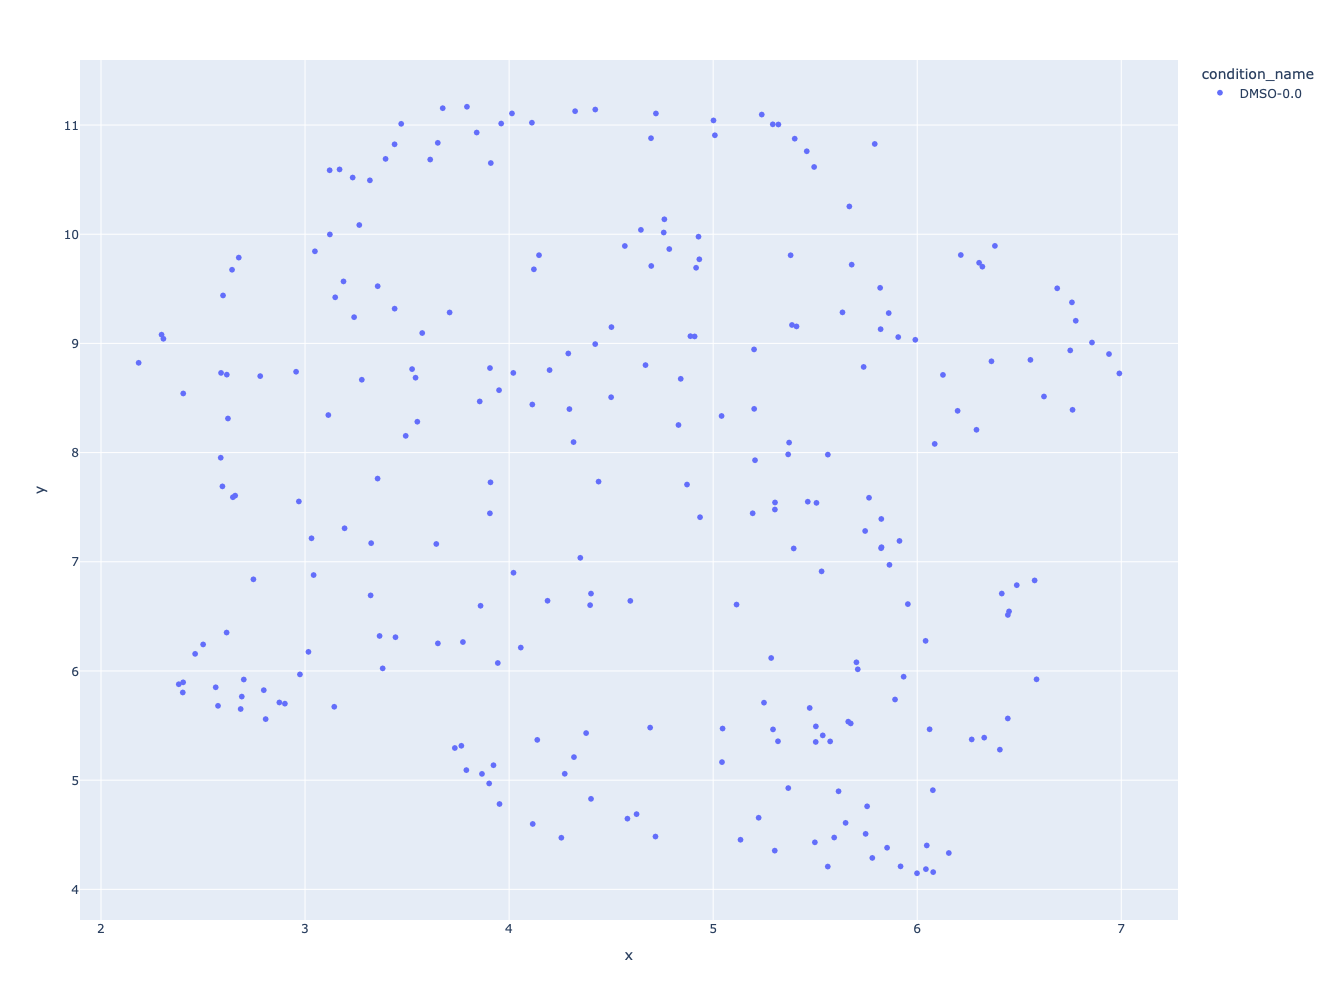

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



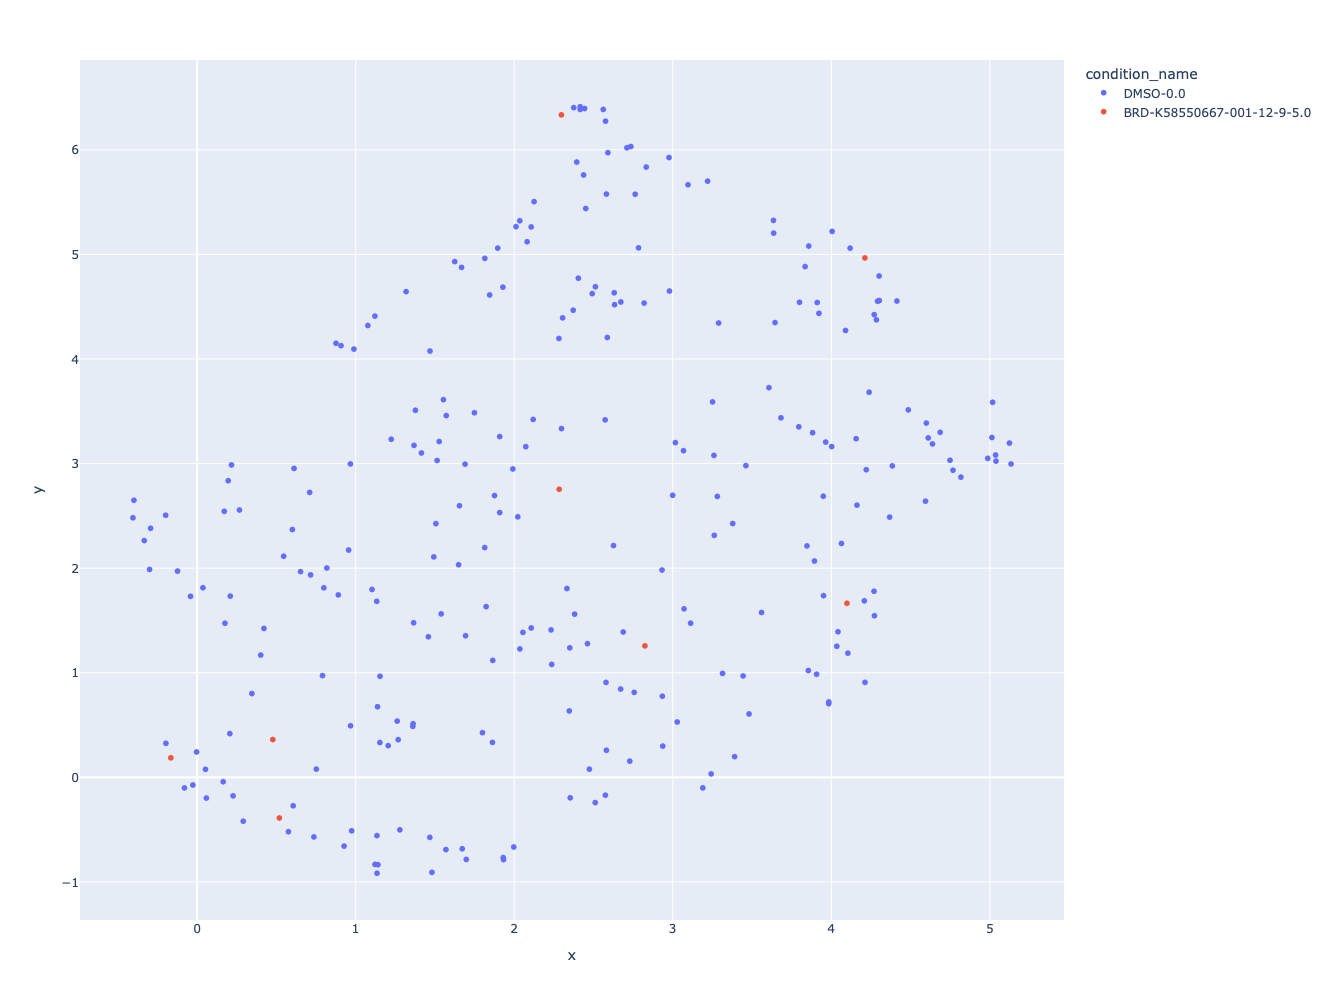

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



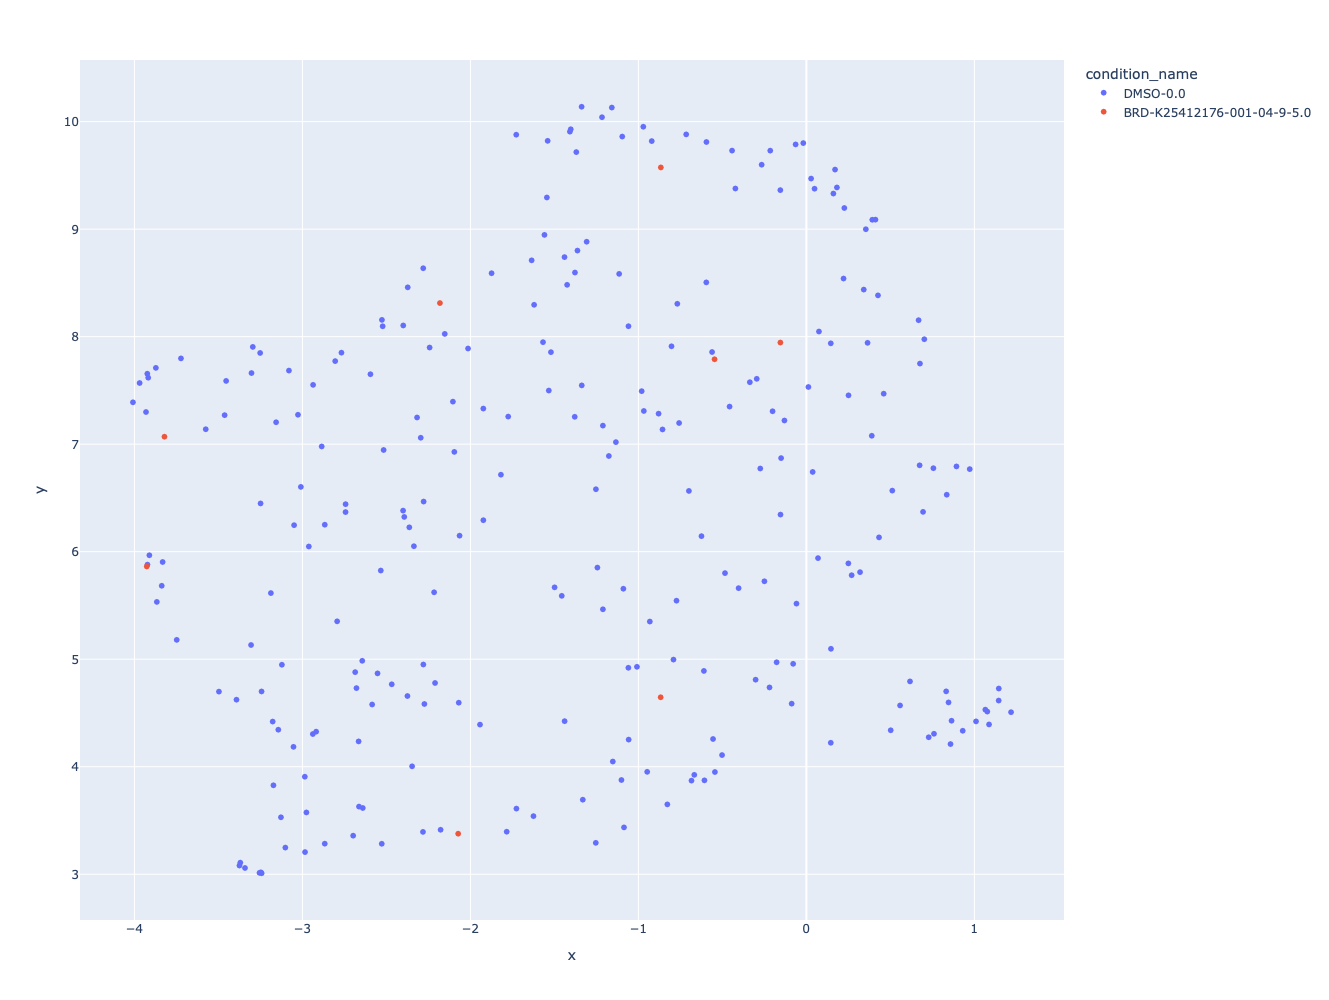

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



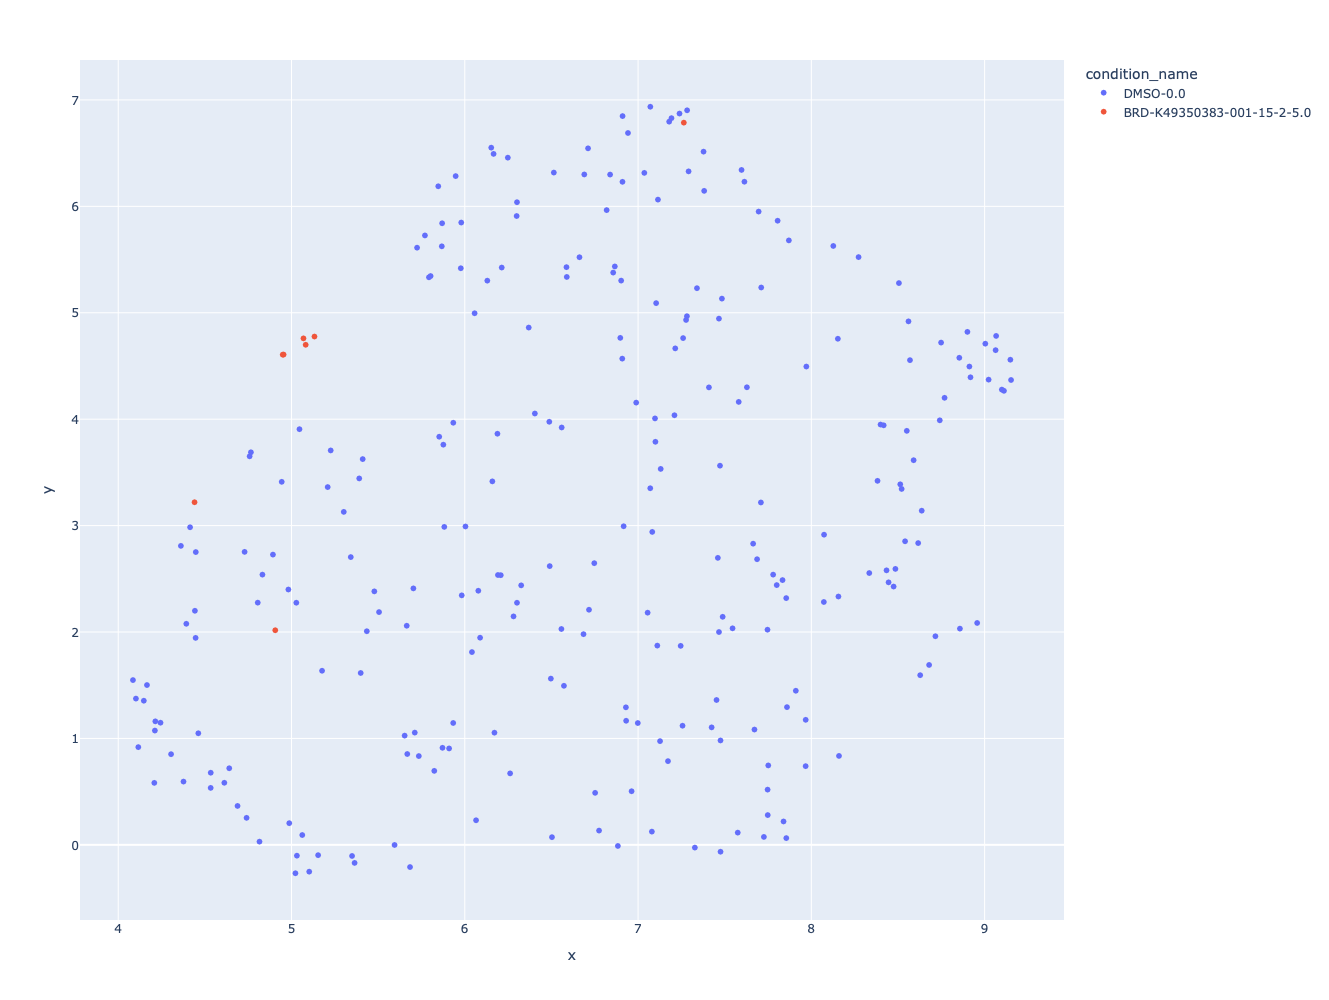

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



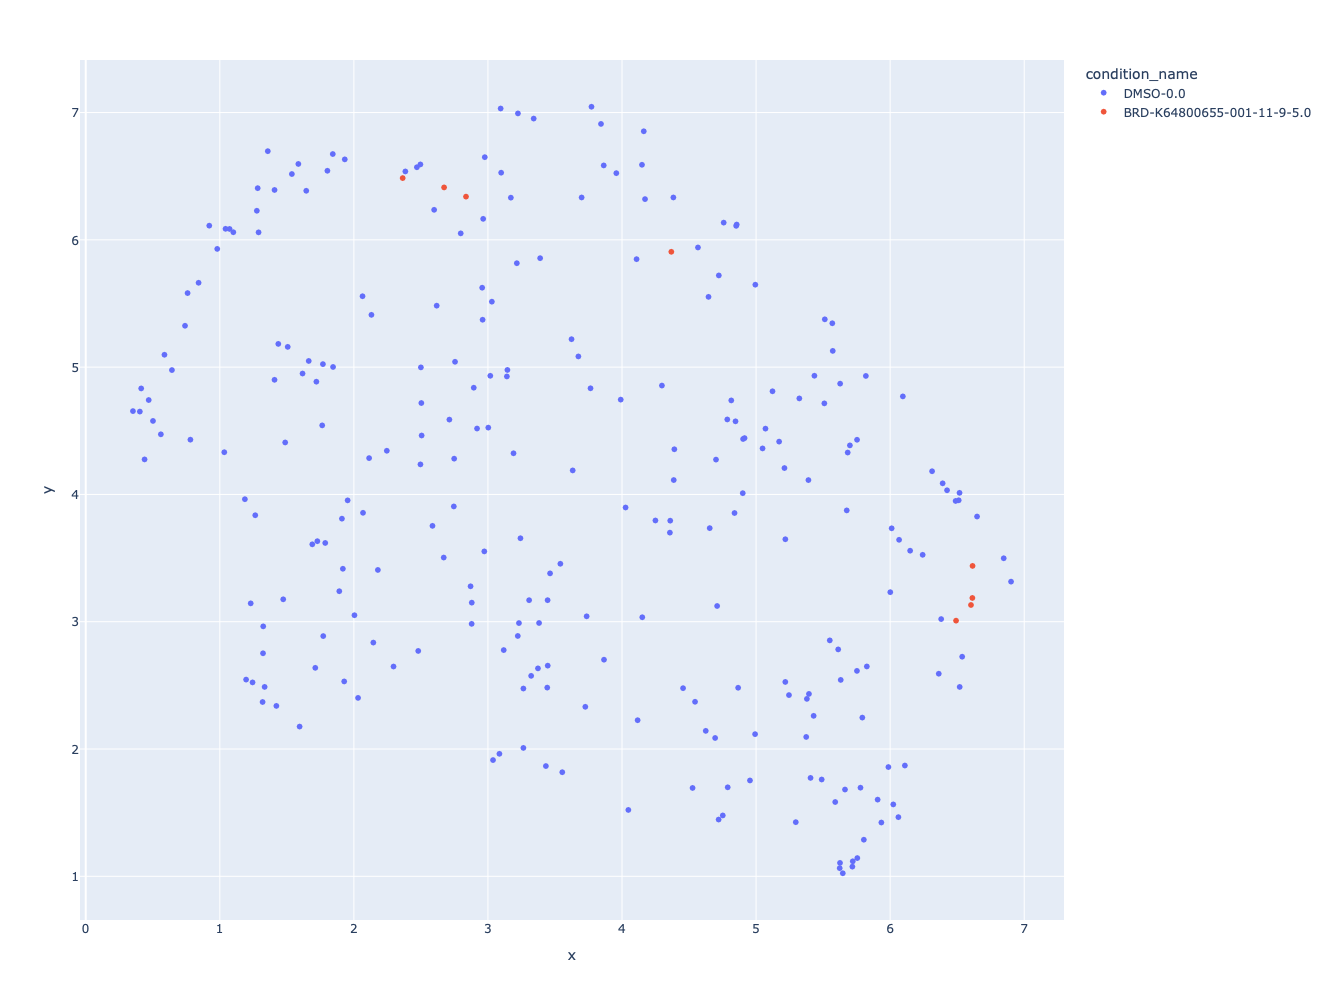

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



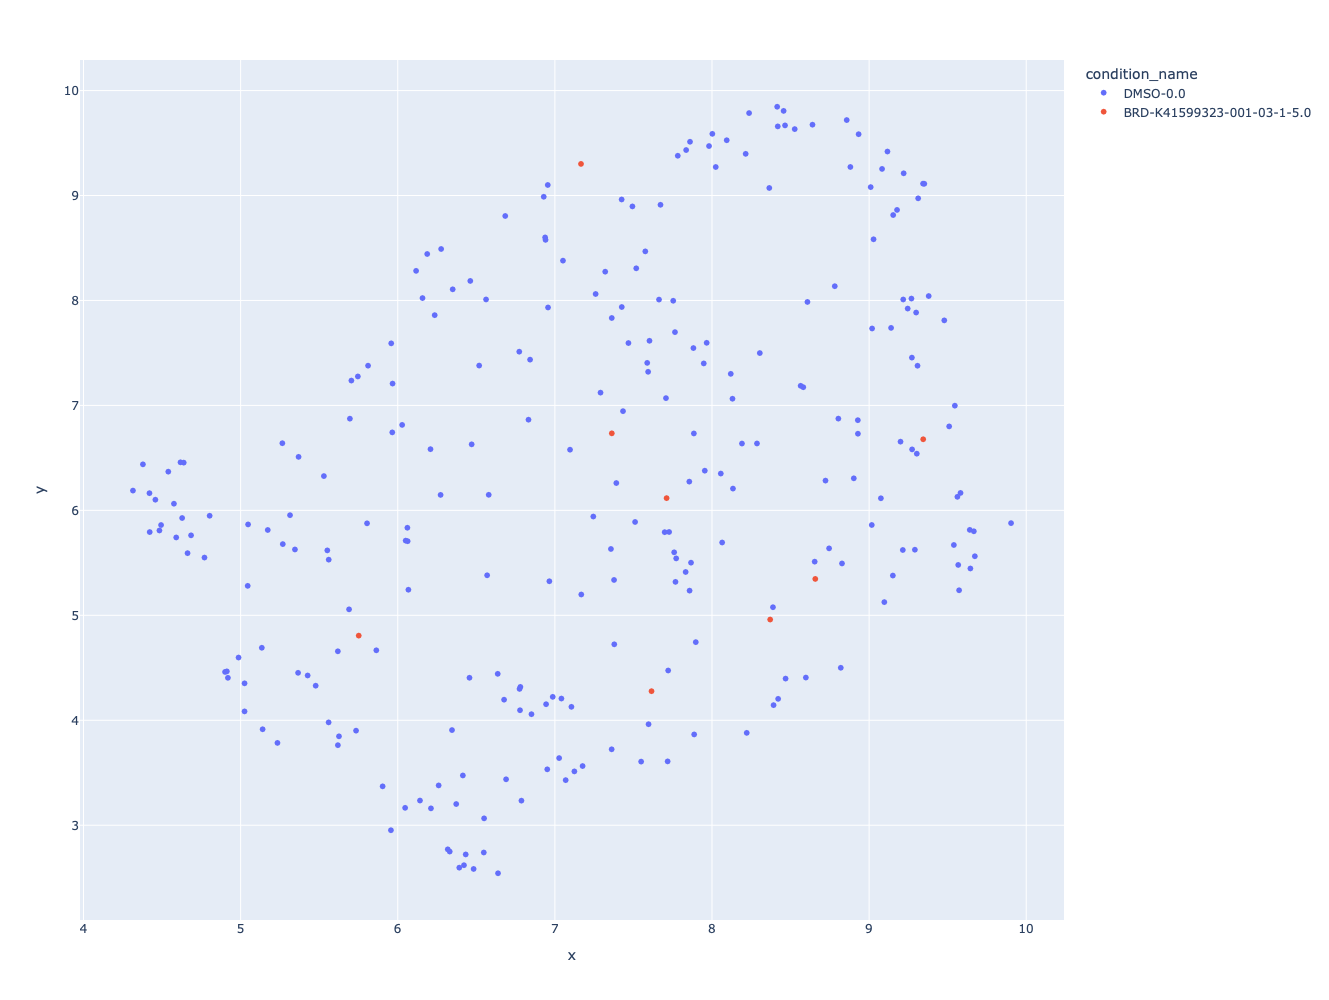

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



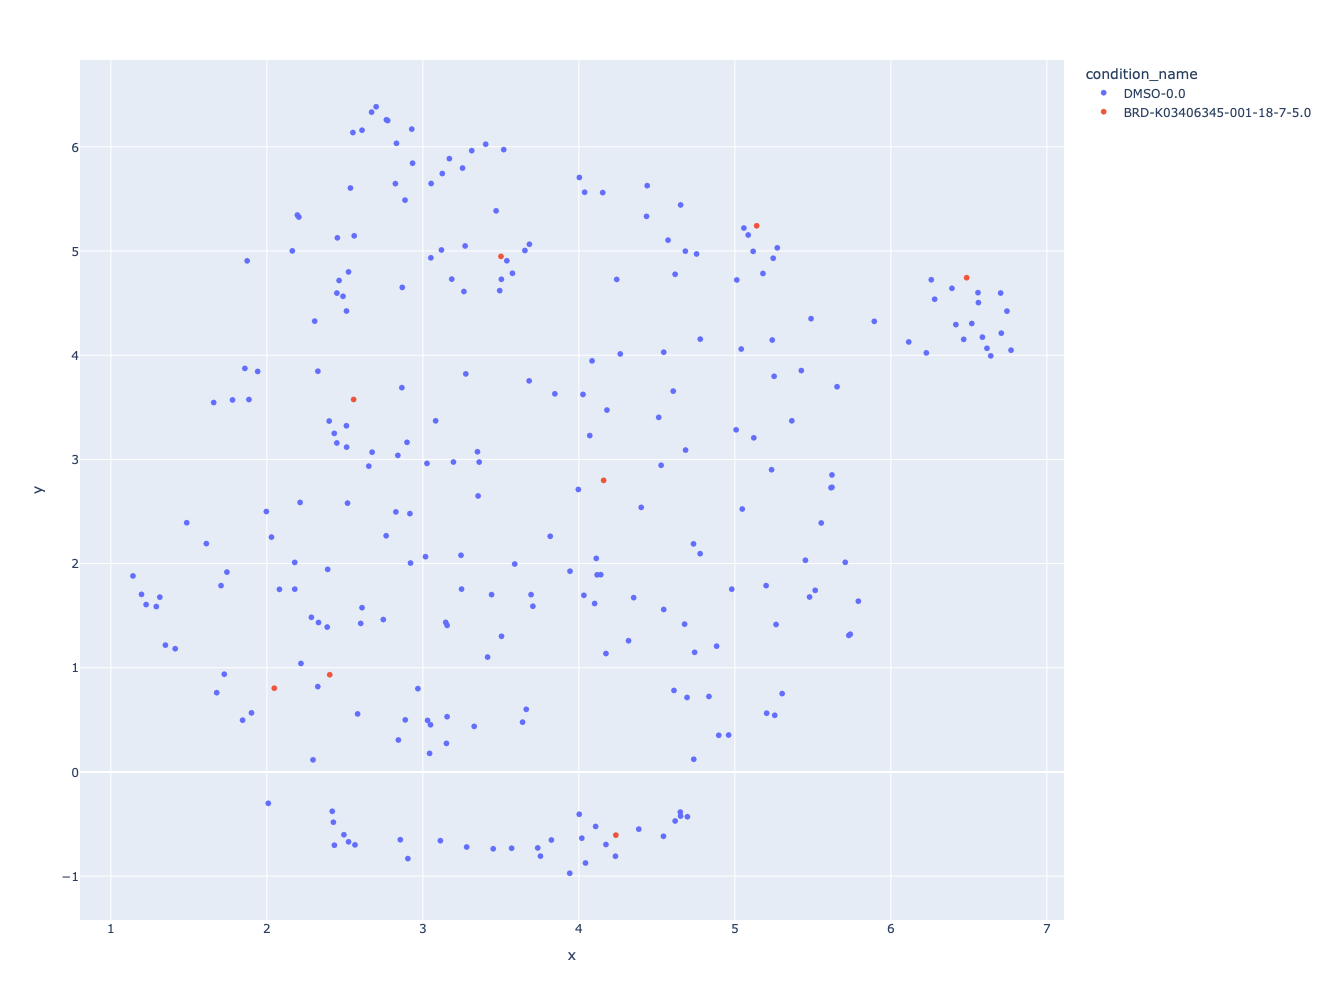

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



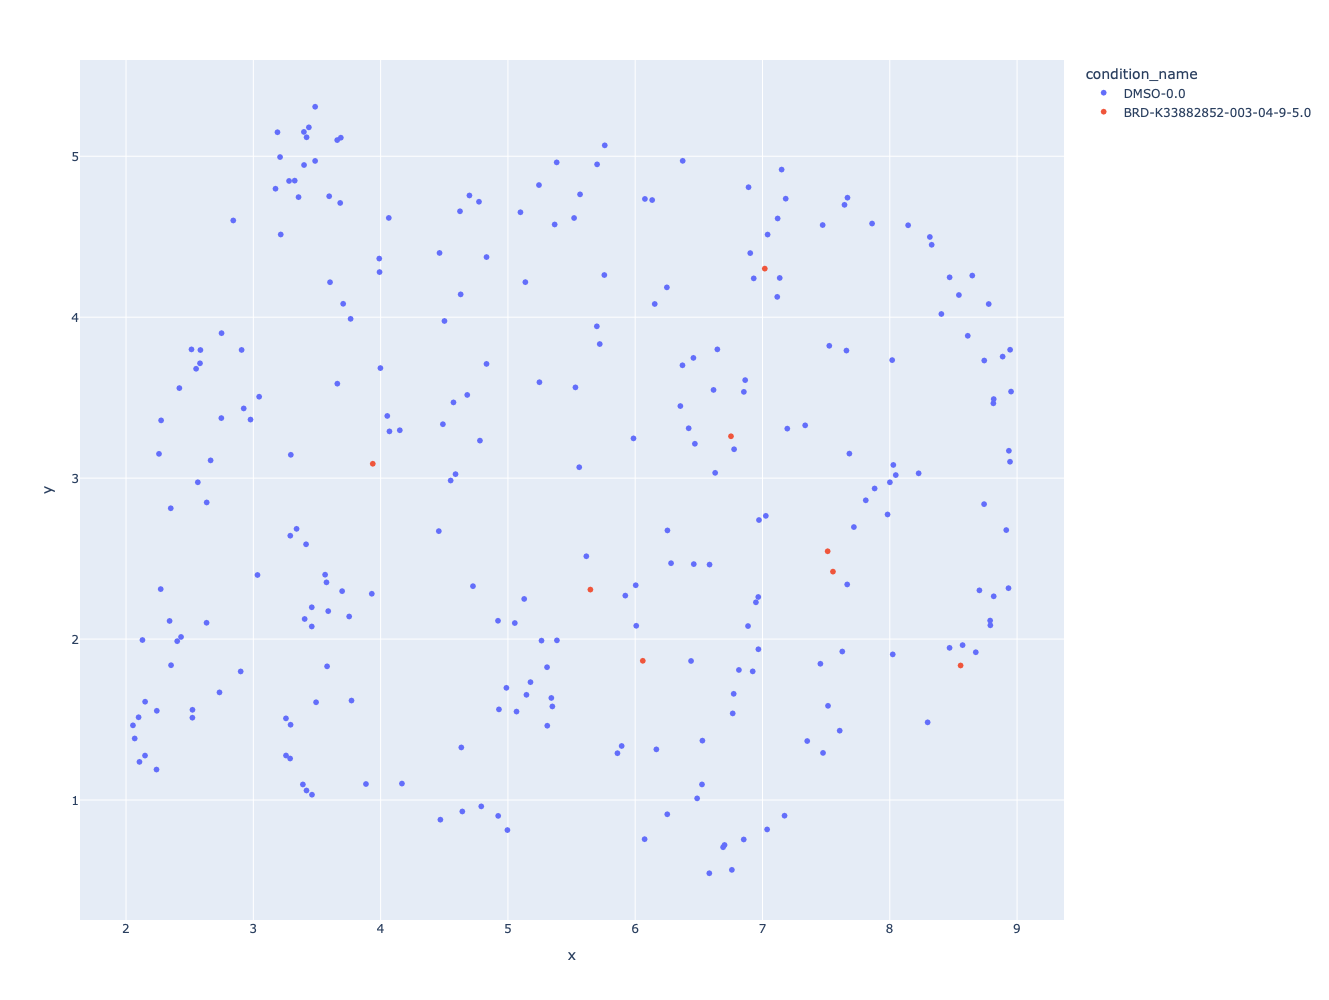

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



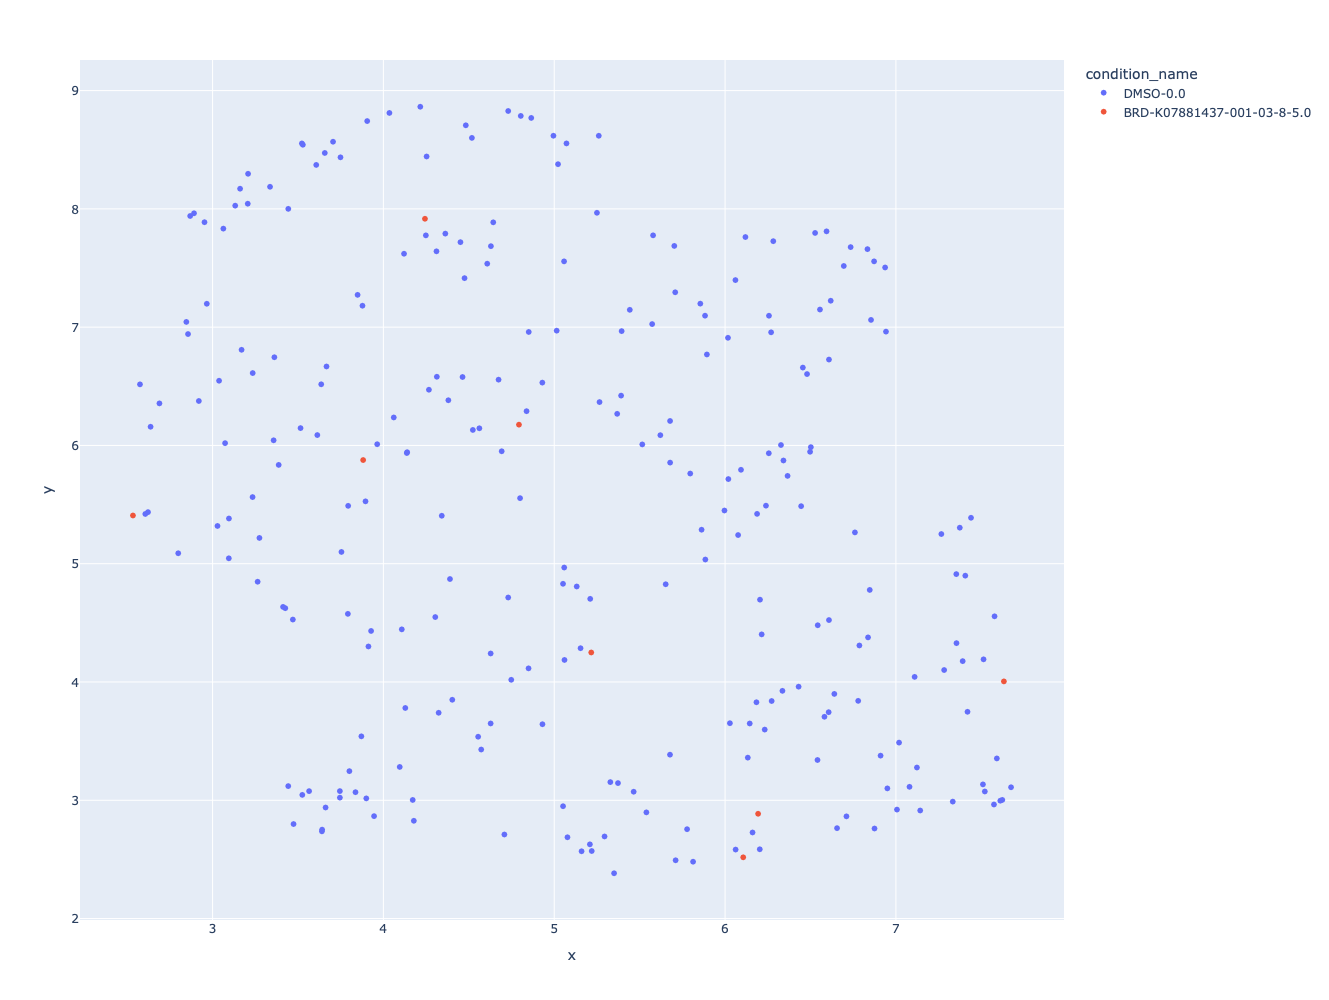

/opt/anaconda3/envs/root_env/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



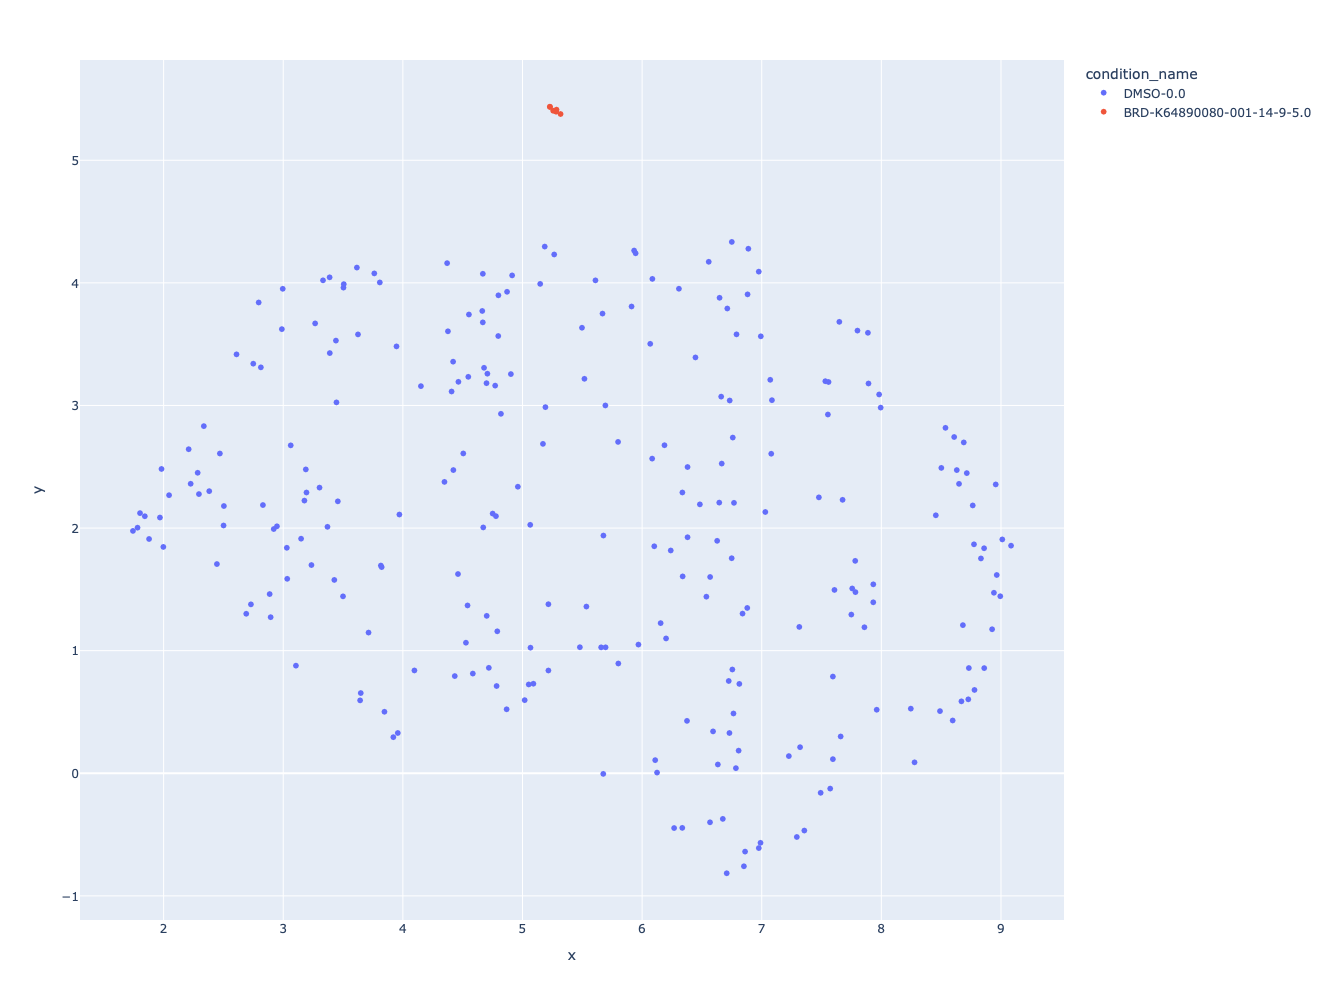

In [177]:
import plotly.express as px
import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
n_neighbors = 10

y = df.query("plate_type == 'jumpcp_ref'").condition_name
comps = df.query("plate_type == 'jumpcp_ref'").condition_name.value_counts().reset_index().query("count > 5").condition_name
for comp in comps:
    features = df.query(f"plate_type == 'jumpcp_ref' & (control_type == 'negcon' | condition_name == '{comp}')").loc[:, df.columns.isin(embs)]
    cond_not_cond = df.query(f"plate_type == 'jumpcp_ref' & (control_type == 'negcon' | condition_name == '{comp}')").condition_name
    #cond_not_cond = y.apply(lambda x: comp if x == comp else f"not {comp}")
    #features = PCA(n_components=10).fit_transform(features)
    
    umap_2d = umap.UMAP(n_components=2, init='random', random_state=0, 
                        #n_neighbors=n_neighbors
                       )
    #umap_3d = umap.UMAP(n_components=3, init='random', random_state=0, n_neighbors=n_neighbors)
    
    proj_2d = umap_2d.fit_transform(features)
    #proj_2d = features
    #proj_3d = umap_3d.fit_transform(features)
    
    # fig_2d = px.scatter(
    #     proj_2d, x=0, y=1,
    #     color=plates, labels={'color': 'plate'}
    # )
    
    fig_2d = px.scatter(
        x=proj_2d[:,0], y=proj_2d[:,1],
        color=cond_not_cond, labels={'color': 'condition_name'}
    )
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.plate, labels={'color': 'plate'}
# )
# fig_3d.update_traces(marker_size=5)


# tsne = TSNE(n_components=2, random_state=0, perplexity=60.0)
# projections = tsne.fit_transform(features)

# fig_2d = px.scatter(
#     projections, x=0, y=1,
#     color=plates, labels={'color': 'plates'}
# )
    
    fig_2d.update_traces()
    fig_2d.update_layout(
        height=1000,  # set the height in pixels
        width=1000    # set the width in pixels
    )
    fig_2d.show()
# fig_3d.show()

In [240]:
df.query(f"plate_type == 'jumpcp_ref' & (control_type == 'negcon' | condition_name == '{}')").control_type.values[0]

'negcon'

In [228]:
import numpy as np
from scipy.spatial.distance import euclidean


import plotly.express as px
import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
n_neighbors = 10


def calculate_centroid(points):
    """
    Calculate the centroid (mean point) of a cluster.
    """
    return np.mean(points, axis=0)

def cluster_distance(proj_2d, labels, cluster1, cluster2):
    """
    Calculate the Euclidean distance between the centroids of two clusters.
    
    Parameters:
    proj_2d: 2D array-like
        2D coordinates of the points (e.g., from UMAP projection).
    labels: array-like
        Cluster labels for the points.
    cluster1: value
        Label of the first cluster.
    cluster2: value
        Label of the second cluster.
    
    Returns:
    Distance between centroids of cluster1 and cluster2.
    """
    # Get the points belonging to each cluster
    cluster1_points = proj_2d[labels == cluster1]
    cluster2_points = proj_2d[labels == cluster2]
    
    # Calculate centroids of each cluster
    centroid1 = calculate_centroid(cluster1_points)
    centroid2 = calculate_centroid(cluster2_points)
    
    # Compute the Euclidean distance between the two centroids
    distance = euclidean(centroid1, centroid2)
    
    return distance


y = df.query("plate_type == 'jumpcp_ref'").condition_name
comps_0 = df.query("plate_type == 'jumpcp_ref'").condition_name.value_counts().reset_index().query("count > 0").condition_name
distances = []
controls = []
for comp in comps_0:
    features = df.query(f"plate_type == 'jumpcp_ref' & (control_type == 'negcon' | condition_name == '{comp}')").loc[:, df.columns.isin(embs)]
    cond_not_cond = df.query(f"plate_type == 'jumpcp_ref' & (control_type == 'negcon' | condition_name == '{comp}')").condition_name
    # refs = df.query(f"plate_type == 'jumpcp_ref'")
    # features = refs.loc[(refs.control_type.isna()) | (refs.condition_name == comp)].loc[:, df.columns.isin(embs)]
    # cond_not_cond = refs.loc[(refs.control_type.isna()) | (refs.condition_name == comp)].condition_name

    #cond_not_cond = y.apply(lambda x: comp if x == comp else f"not {comp}")
    #features = PCA(n_components=10).fit_transform(features)
    
    umap_2d = umap.UMAP(n_components=2, init='random', 
                        #n_neighbors=n_neighbors
                       )
    #umap_3d = umap.UMAP(n_components=3, init='random', random_state=0, n_neighbors=n_neighbors)
    
    proj_2d = umap_2d.fit_transform(features)

    # Example usage:
    # Assuming `proj_2d` is the 2D projection, and `cluster_labels` is an array with cluster assignments
    cluster1 = "DMSO-0.0"  # Label of the first cluster
    cluster2 = comp  # Label of the second cluster
    if df.query(f"plate_type == 'jumpcp_ref' & (control_type == 'negcon' | condition_name == '{comp}')").control_type.values[0] is np.nan:
        controls.append("No compound")
    else:
        controls.append("Positive control")
    distance = cluster_distance(proj_2d, cond_not_cond, cluster1, cluster2)
    distances.append(distance)
    print(f"Distance between cluster {cluster1} and cluster {cluster2}: {distance}, {controls[-1]}")


Distance between cluster DMSO-0.0 and cluster DMSO-0.0: 0.0, Positive control
Distance between cluster DMSO-0.0 and cluster BRD-K58550667-001-12-9-5.0: 0.6839103102684021, Positive control
Distance between cluster DMSO-0.0 and cluster BRD-K25412176-001-04-9-5.0: 0.5710979104042053, Positive control
Distance between cluster DMSO-0.0 and cluster BRD-K49350383-001-15-2-5.0: 0.8544732928276062, Positive control
Distance between cluster DMSO-0.0 and cluster BRD-K64800655-001-11-9-5.0: 0.908487856388092, Positive control
Distance between cluster DMSO-0.0 and cluster BRD-K41599323-001-03-1-5.0: 0.5467456579208374, Positive control
Distance between cluster DMSO-0.0 and cluster BRD-K03406345-001-18-7-5.0: 0.20352500677108765, Positive control
Distance between cluster DMSO-0.0 and cluster BRD-K33882852-003-04-9-5.0: 1.1883479356765747, Positive control
Distance between cluster DMSO-0.0 and cluster BRD-K07881437-001-03-8-5.0: 0.4994968771934509, Positive control
Distance between cluster DMSO-0.0 

289


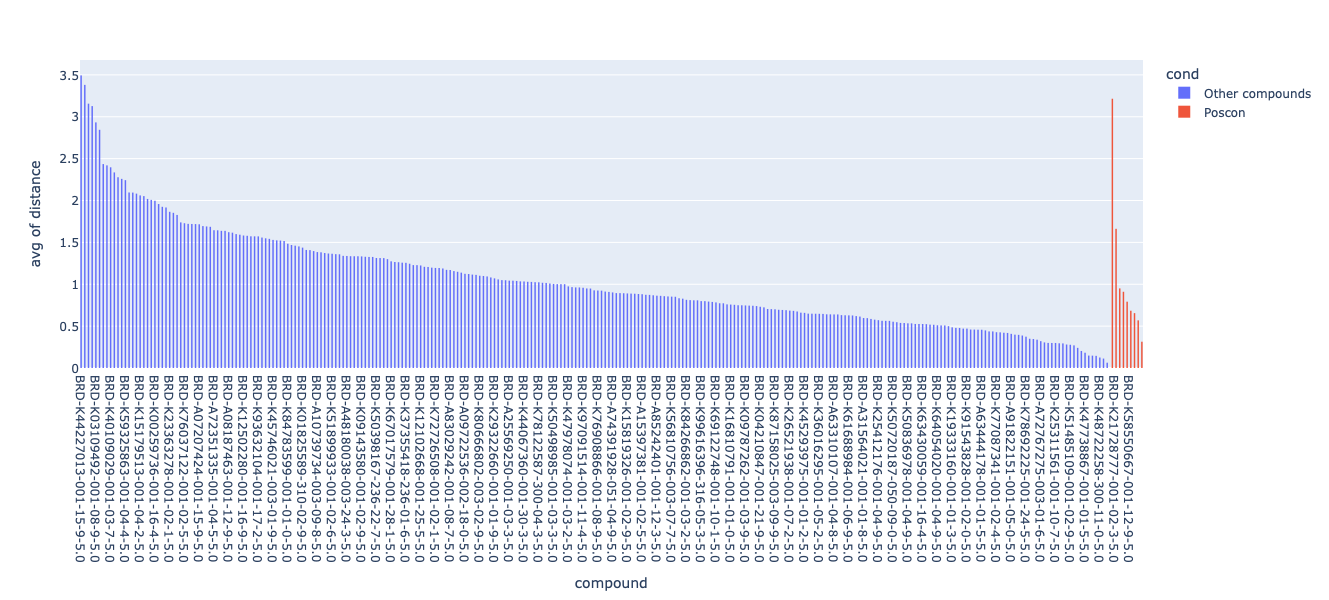

In [254]:
comps_0 = df.query("plate_type == 'jumpcp_ref'").condition_name.value_counts().reset_index().query("count > 0").condition_name
checking_comp = []
for comp in comps_0.values:
    if comp in df.query(f"plate_type == 'jumpcp_ref'").loc[df.query(f"plate_type == 'jumpcp_ref'").control_type.isna()].condition_name.values:
        checking_comp.append("Other compounds")
    else:
        checking_comp.append("Poscon")
print(len(checking_comp))

df_out = pd.DataFrame({"compound": comps_0.to_list(), "distance": distances, "cond": checking_comp}).sort_values(by = "distance", ascending = False)
fig = px.histogram(df_out, x="compound", y="distance",barmode='group', color = "cond",
             histfunc='avg',
             height=400)

fig.update_layout(
    height=600,  # set the height in pixels
    width=1200   # set the width in pixels
)
fig.show()

In [239]:
no_comps = np.unique(df.query(f"plate_type == 'jumpcp_ref'").loc[df.query(f"plate_type == 'jumpcp_ref'").control_type.isna()].condition_name)
comps = np.unique(df.query(f"plate_type == 'jumpcp_ref'").loc[~df.query(f"plate_type == 'jumpcp_ref'").control_type.isna()].condition_name)

In [213]:
df.query(f"plate_type == 'jumpcp_ref' & control_type == 'poscon'").condition_name

67      BRD-K58550667-001-12-9-5.0
110     BRD-K91188791-001-17-5-5.0
148     BRD-A10188456-001-04-9-5.0
160     BRD-K58550667-001-12-9-5.0
172     BRD-K59632282-052-03-1-5.0
217     BRD-K89517477-001-03-9-5.0
232     BRD-K28132190-001-02-0-5.0
233     BRD-K38775274-001-22-1-5.0
253     BRD-K21728777-001-02-3-5.0
301     BRD-K47557313-001-03-9-5.0
414     BRD-K58550667-001-12-9-5.0
454     BRD-K91188791-001-17-5-5.0
495     BRD-A10188456-001-04-9-5.0
508     BRD-K59632282-052-03-1-5.0
521     BRD-K58550667-001-12-9-5.0
561     BRD-K38775274-001-22-1-5.0
578     BRD-K28132190-001-02-0-5.0
597     BRD-K21728777-001-02-3-5.0
607     BRD-K89517477-001-03-9-5.0
653     BRD-K47557313-001-03-9-5.0
709     BRD-K91188791-001-17-5-5.0
789     BRD-K58550667-001-12-9-5.0
852     BRD-K59632282-052-03-1-5.0
856     BRD-A10188456-001-04-9-5.0
871     BRD-K58550667-001-12-9-5.0
898     BRD-K89517477-001-03-9-5.0
901     BRD-K28132190-001-02-0-5.0
915     BRD-K38775274-001-22-1-5.0
936     BRD-K2172877

In [208]:
df.query(f"plate_type == 'jumpcp_ref'").control_type.isna()

0       True
1       True
2       True
3       True
4       True
        ... 
1386    True
1387    True
1388    True
1389    True
1390    True
Name: control_type, Length: 1391, dtype: bool

In [235]:
comps

0                        DMSO-0.0
1      BRD-K58550667-001-12-9-5.0
2      BRD-K25412176-001-04-9-5.0
3      BRD-K49350383-001-15-2-5.0
4      BRD-K64800655-001-11-9-5.0
                  ...            
284    BRD-K45293975-001-01-2-5.0
285    BRD-K44227013-001-15-9-5.0
286    BRD-K59325863-001-04-4-5.0
287    BRD-K87782578-001-03-9-5.0
288    BRD-K80970344-201-10-9-5.0
Name: condition_name, Length: 289, dtype: object

In [241]:
comps_0 = df.query("plate_type == 'jumpcp_ref'").condition_name.value_counts().reset_index().query("count > 0").condition_name
comps_0

0                        DMSO-0.0
1      BRD-K58550667-001-12-9-5.0
2      BRD-K25412176-001-04-9-5.0
3      BRD-K49350383-001-15-2-5.0
4      BRD-K64800655-001-11-9-5.0
                  ...            
284    BRD-K45293975-001-01-2-5.0
285    BRD-K44227013-001-15-9-5.0
286    BRD-K59325863-001-04-4-5.0
287    BRD-K87782578-001-03-9-5.0
288    BRD-K80970344-201-10-9-5.0
Name: condition_name, Length: 289, dtype: object

In [242]:
df.query(f"plate_type == 'jumpcp_ref'").loc[df.query(f"plate_type == 'jumpcp_ref'").control_type.isna()].condition_name

0       BRD-K48278478-001-01-2-5.0
1       BRD-A43005764-003-02-9-5.0
2       BRD-A85242401-001-12-3-5.0
3       BRD-K29895144-001-01-0-5.0
4       BRD-K09338665-001-07-1-5.0
                   ...            
1386    BRD-K57708067-001-02-9-5.0
1387    BRD-K68567222-001-02-0-5.0
1388    BRD-K09338665-001-07-1-5.0
1389    BRD-K20093108-001-02-3-5.0
1390    BRD-K53061490-003-13-9-5.0
Name: condition_name, Length: 1095, dtype: object

In [244]:
checking_comp = []
for comp in comps_0.values:
    if comp in df.query(f"plate_type == 'jumpcp_ref'").loc[df.query(f"plate_type == 'jumpcp_ref'").control_type.isna()].condition_name.values:
        checking_comp.append(comp)
print(len(checking_comp))



    

279


In [ ]:
import plotly.express as px
import umap.umap_ as umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
n_neighbors = 10


for plate in df.query(f"plate_type == 'jumpcp_ref'").plate.value_counts().reset_index()["plate"].values:
    features = df.query(f"plate == {plate} & (control_type == 'negcon' | condition_name == '{comp}')").loc[:, df.columns.isin(embs)]
    cond_not_cond = df.query(f"plate_type == 'jumpcp_ref' & (control_type == 'negcon' | condition_name == '{comp}')").condition_name
    #cond_not_cond = y.apply(lambda x: comp if x == comp else f"not {comp}")
    #features = PCA(n_components=10).fit_transform(features)
    
    umap_2d = umap.UMAP(n_components=2, init='random', random_state=0, 
                        #n_neighbors=n_neighbors
                       )
    #umap_3d = umap.UMAP(n_components=3, init='random', random_state=0, n_neighbors=n_neighbors)
    
    proj_2d = umap_2d.fit_transform(features)
    #proj_2d = features
    #proj_3d = umap_3d.fit_transform(features)
    
    # fig_2d = px.scatter(
    #     proj_2d, x=0, y=1,
    #     color=plates, labels={'color': 'plate'}
    # )
    
    fig_2d = px.scatter(
        x=proj_2d[:,0], y=proj_2d[:,1],
        color=cond_not_cond, labels={'color': 'condition_name'}
    )
# fig_3d = px.scatter_3d(
#     proj_3d, x=0, y=1, z=2,
#     color=df.plate, labels={'color': 'plate'}
# )
# fig_3d.update_traces(marker_size=5)


# tsne = TSNE(n_components=2, random_state=0, perplexity=60.0)
# projections = tsne.fit_transform(features)

# fig_2d = px.scatter(
#     projections, x=0, y=1,
#     color=plates, labels={'color': 'plates'}
# )
    
    fig_2d.update_traces()
    fig_2d.update_layout(
        height=1000,  # set the height in pixels
        width=1000    # set the width in pixels
    )
    fig_2d.show()
# fig_3d.show()

In [252]:
df.query(f"plate_type == 'jumpcp_ref'").plate.value_counts().reset_index()["plate"]

0    JCPQC052
1    JCPQC051
2    JCPQC053
3    JCPQC054
Name: plate, dtype: object